<a href="https://colab.research.google.com/github/Aaryant31/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/Rahul_Kumar_Soni_ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

---
# importing
---

In [ ]:
#importing all the important librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})

In [ ]:
# Set the display figure size using rcParams method 
sns.set(rc={'figure.figsize':(10,6)})
plt.rcParams['figure.figsize'] = [10,6]

In [ ]:
# importing data files 
meta_df = pd.read_csv('https://raw.githubusercontent.com/Aaryant31/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/main/Data/Zomato%20Restaurant%20names%20and%20Metadata.csv')
reviews_df = pd.read_csv('https://raw.githubusercontent.com/Aaryant31/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/main/Data/Zomato%20Restaurant%20reviews.csv')

---
# Dataset inspection
---

## Meta Data

In [ ]:
# to get the first five rows of the data set 
meta_df.head()

Name  ...                                            Timings
0                 Beyond Flavours  ...      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)
1                        Paradise  ...                                     11 AM to 11 PM
2                        Flechazo  ...              11:30 AM to 4:30 PM, 6:30 PM to 11 PM
3  Shah Ghouse Hotel & Restaurant  ...                                    12 Noon to 2 AM
4      Over The Moon Brew Company  ...  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

[5 rows x 6 columns]

In [ ]:
# to get the information about the data
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
# finding the count of null values
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Observation : we have 54 null Values in collection Column

In [ ]:
# to get the description of the data
meta_df.describe().transpose()

count  ... freq
Name          105  ...    1
Links         105  ...    1
Cost          105  ...   13
Collections    51  ...    4
Cuisines      105  ...    4
Timings       104  ...    6

[6 rows x 4 columns]

In [ ]:
#checking for duplicate entries
print(len(meta_df.drop_duplicates()))
print(len(meta_df['Name'].drop_duplicates()))

105
105


In [ ]:
# checking dType and non null values
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
# checking for unique values in cost function
meta_df.Cost.value_counts()

500      13
600      10
700       8
1,200     7
1,000     6
400       6
200       5
800       5
1,500     5
1,300     4
1,100     3
1,600     3
750       3
350       3
900       3
550       3
1,400     2
1,700     2
450       2
1,900     2
150       2
1,750     1
2,800     1
2,500     1
850       1
250       1
650       1
1,800     1
300       1
Name: Cost, dtype: int64

In [ ]:
# changing the data type of the cost function
meta_df['Cost'] = meta_df['Cost'].str.replace(",","").astype('int64')

## Reviews

In [ ]:
# to get the first five rows of the data set 
reviews_df.head()

Restaurant              Reviewer  ...             Time Pictures
0  Beyond Flavours     Rusha Chakraborty  ...  5/25/2019 15:54        0
1  Beyond Flavours  Anusha Tirumalaneedi  ...  5/25/2019 14:20        0
2  Beyond Flavours       Ashok Shekhawat  ...  5/24/2019 22:54        0
3  Beyond Flavours        Swapnil Sarkar  ...  5/24/2019 22:11        0
4  Beyond Flavours                Dileep  ...  5/24/2019 21:37        0

[5 rows x 7 columns]

In [ ]:
# to get the information about the data
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
# finding the count of null values
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [ ]:
#checking Value of Rating Columns
reviews_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

observation : we can see here there is one rating filled as category i.e 'Like' 

In [ ]:
# substitutiong 'like' observation first by nan values ans then by mean of the feature 
reviews_df.loc[reviews_df['Rating'] == 'Like'] = np.nan
reviews_df['Rating'] = reviews_df['Rating'].astype('float64')
print(reviews_df['Rating'].mean())

3.601044071880333


In [ ]:
# since the mean is 3.6 we will round off it by 3.5
reviews_df['Rating'].fillna(3.5,inplace=True)

In [ ]:
# feature engineering the data
reviews_df['Reviews'],reviews_df['Followers']=reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour
reviews_df = reviews_df.drop(['Metadata'], axis =1)

In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  9999 non-null   object        
 1   Reviewer    9961 non-null   object        
 2   Review      9954 non-null   object        
 3   Rating      10000 non-null  float64       
 4   Time        9961 non-null   datetime64[ns]
 5   Pictures    9999 non-null   float64       
 6   Reviews     9961 non-null   float64       
 7   Followers   8383 non-null   float64       
 8   Year        9961 non-null   float64       
 9   Month       9961 non-null   float64       
 10  Hour        9961 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 859.5+ KB


In [ ]:
#checking for null values
reviews_df.isna().sum()

Restaurant       1
Reviewer        39
Review          46
Rating           0
Time            39
Pictures         1
Reviews         39
Followers     1617
Year            39
Month           39
Hour            39
dtype: int64

In [ ]:
# creating function to find the percentage missing vales 
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [ ]:
#calling function to plot missing value Percentage
percent_nan = percent_missing(reviews_df)

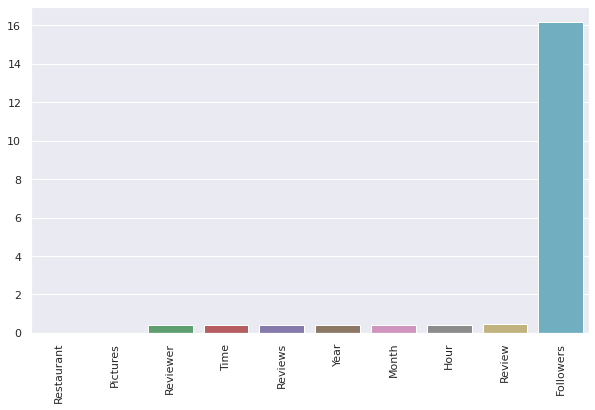

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

observation : Followers columns has large number of mising values

(0.0, 1.0)

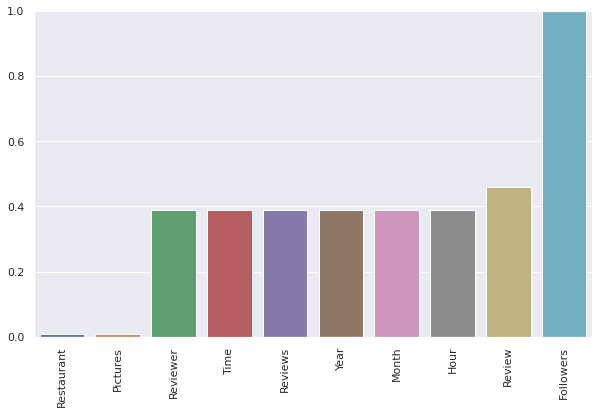

In [ ]:
# checking for missing value colums which are less than 1 percent
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
# Set 1% Threshold
plt.ylim(0,1)

In [ ]:
percent_nan[percent_nan < 1]

Restaurant    0.01
Pictures      0.01
Reviewer      0.39
Time          0.39
Reviews       0.39
Year          0.39
Month         0.39
Hour          0.39
Review        0.46
dtype: float64

observation : since most of the column missing percentage is 0.39% so, it quite possible that same row of each column is having null value, if so we can remove those row, lets check it...

In [ ]:
# Checking null values observation in Restaurant feature
reviews_df[reviews_df['Restaurant'].isnull()]

Restaurant Reviewer Review  Rating  ... Followers  Year  Month  Hour
7601        NaN      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN

[1 rows x 11 columns]

In [ ]:
# Checking null values observation in Pictures feature
reviews_df[reviews_df['Pictures'].isnull()]

Restaurant Reviewer Review  Rating  ... Followers  Year  Month  Hour
7601        NaN      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN

[1 rows x 11 columns]

In [ ]:
# Checking null values observation in Reviewer feature
reviews_df[reviews_df['Reviewer'].isnull()]

Restaurant Reviewer Review  Rating  ... Followers  Year  Month  Hour
7601                  NaN      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8777  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8778  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8779  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8780  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8781  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8782  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8783  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8784  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8785  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8786  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8787  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8788  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8789  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8790  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8791  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8792  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8793  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8794  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8795  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8796  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8797  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8798  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
8799  American Wild Wings      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
9085         Arena Eleven      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
9086         Arena Eleven      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
9087         Arena Eleven      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
9088         Arena Eleven      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
9089         Arena Eleven      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
9090         Arena Eleven      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
9091         Arena Eleven      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
9092         Arena Eleven      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
9093         Arena Eleven      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
9094         Arena Eleven      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
9095         Arena Eleven      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
9096         Arena Eleven      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
9097         Arena Eleven      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
9098         Arena Eleven      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN
9099         Arena Eleven      NaN    NaN     3.5  ...       NaN   NaN    NaN   NaN

[39 rows x 11 columns]

In [ ]:
# Checking null values observation in Followers feature
reviews_df[reviews_df['Followers'].isna()]

Restaurant          Reviewer  ... Month  Hour
5      Beyond Flavours     Nagabhavani K  ...   5.0  15.0
6      Beyond Flavours   Jamuna Bhuwalka  ...   5.0   1.0
7      Beyond Flavours         Sandhya S  ...   5.0  15.0
14     Beyond Flavours     Kankaria.ritu  ...   5.0  21.0
24     Beyond Flavours     Amritap Datta  ...   5.0  23.0
...                ...               ...  ...   ...   ...
9912  Chinese Pavilion          Anil Rao  ...   4.0   2.0
9918  Chinese Pavilion       Ajay Munjal  ...   2.0  13.0
9933  Chinese Pavilion   Korak Mukherjee  ...   5.0  16.0
9940  Chinese Pavilion     Anubinda Dash  ...   3.0  19.0
9948  Chinese Pavilion  Krishna Peddinti  ...  10.0   5.0

[1617 rows x 11 columns]

In [ ]:
# finning the nan values of followers by 0
reviews_df['Followers'].fillna(0,inplace=True)

In [ ]:
# since all the data is cleaned and the missing data is common for all the features we can drop them all
reviews_df.dropna(inplace=True)

In [ ]:
# checking null values in the data set 
reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Hour          0
dtype: int64

---
# EDA
---

## Meta Data

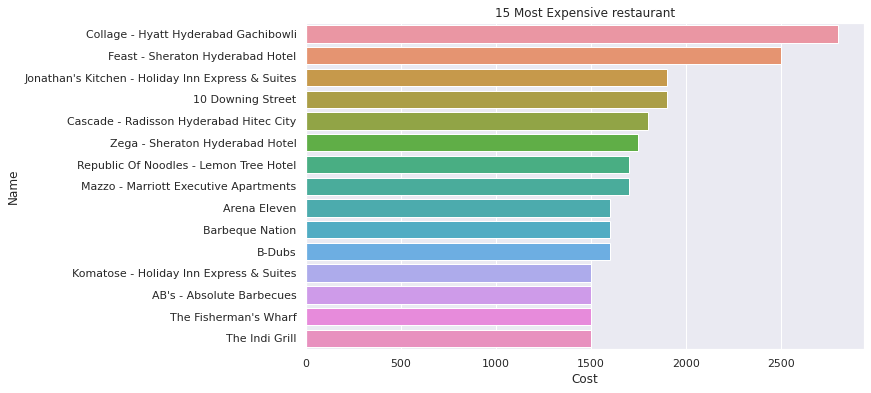

In [ ]:
# checking for most expensive Restaurant
sns.barplot(x='Cost',
            y="Name", 
            data=meta_df, 
            order=meta_df.sort_values('Cost',ascending=False).Name[:15])

plt.title('15 Most Expensive restaurant')
plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

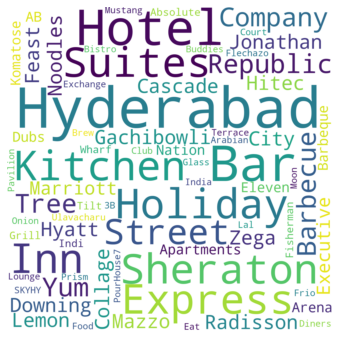

In [ ]:
#Creating the text variable

text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

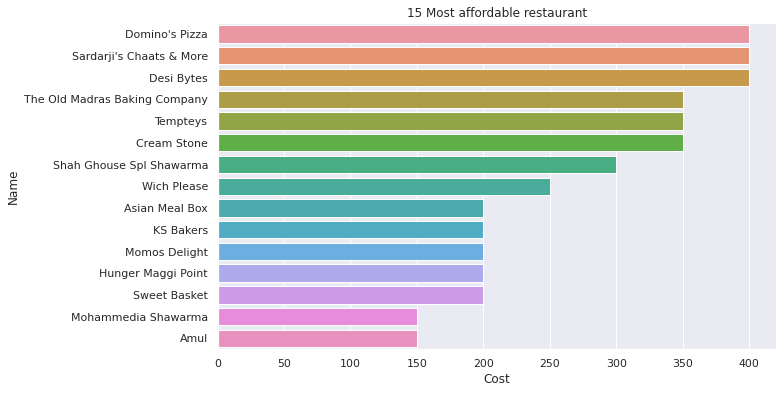

In [ ]:
# checking for most affordable Restaurant
sns.barplot(x='Cost',
            y="Name", 
            data=meta_df, 
            order=meta_df.sort_values('Cost',ascending=False).Name[-15:])

plt.title('15 Most affordable restaurant')
plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

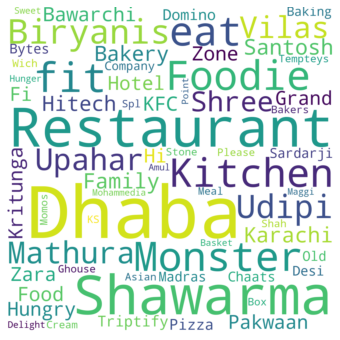

In [ ]:
#Creating the text variable

text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[-30:])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

In [ ]:
# lets find the most cusines offered by Restaurants
meta_df.Cuisines     

0      Chinese, Continental, Kebab, European, South I...
1                         Biryani, North Indian, Chinese
2           Asian, Mediterranean, North Indian, Desserts
3      Biryani, North Indian, Chinese, Seafood, Bever...
4      Asian, Continental, North Indian, Chinese, Med...
                             ...                        
100                                     Fast Food, Salad
101                                       Bakery, Mithai
102                       North Indian, Biryani, Chinese
103                                            Fast Food
104                      Thai, Asian, Chinese, Malaysian
Name: Cuisines, Length: 105, dtype: object

In [ ]:
# spliting the cusines and storing in list 
cuisine_list=meta_df.Cuisines.str.split(', ')
cuisine_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

In [ ]:
# storing all the cusines in a dict 
cuis_dict = {}
for names in cuisine_list:
    for name in names:
        if (name in cuis_dict):
            cuis_dict[name]+=1
        else:  
            cuis_dict[name]=1 

In [ ]:
# converting the dict to a data frame 
cuis_df=pd.DataFrame.from_dict([cuis_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurants'})

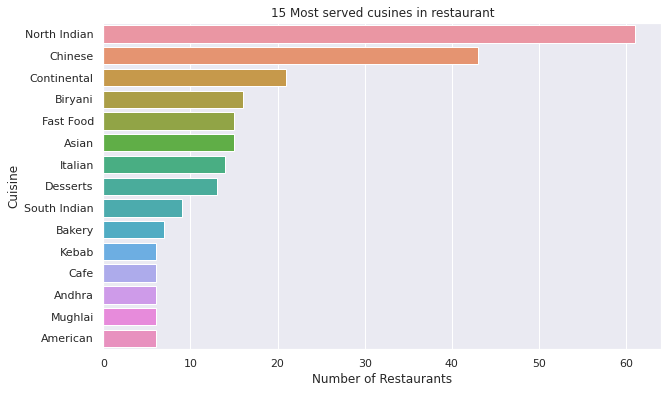

In [ ]:
# graph for most cusines served in restaurant
sns.barplot(y='Cuisine',
            x="Number of Restaurants", 
            data=cuis_df, 
            order=cuis_df.sort_values('Number of Restaurants',ascending=False).Cuisine[:15])
plt.title('15 Most served cusines in restaurant')
plt.show()


In [ ]:
cuisine_list


0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

(-0.5, 1399.5, 1399.5, -0.5)

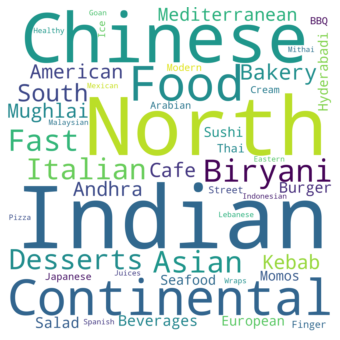

In [ ]:
#Creating the text variable

text = " ".join(name for name in meta_df.Cuisines )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

In [ ]:
# spliting the cusines and storing in list 
Collections_list=meta_df.Collections.dropna().str.split(', ')
Collections_list

0      [Food Hygiene Rated Restaurants in Hyderabad, ...
1                                  [Hyderabad's Hottest]
2                   [Great Buffets, Hyderabad's Hottest]
3                               [Late Night Restaurants]
4      [Best Bars & Pubs, Food Hygiene Rated Restaura...
5      [Sunday Brunches, Corporate Favorites, Great B...
6          [Food Hygiene Rated Restaurants in Hyderabad]
8      [Great Buffets, Live Sports Screenings, Best B...
9                                      [Frozen Delights]
10       [Street Food, Veggie Friendly, Pocket Friendly]
11                                    [Barbecue & Grill]
12                                       [Great Buffets]
13     [Corporate Favorites, Happy Hours, Live Sports...
14     [Barbecue & Grill, Great Buffets, Corporate Fa...
18                                  [Trending This Week]
19                                  [Trending This Week]
20                                     [Veggie Friendly]
21                      [Great 

In [ ]:
# storing all the cusines in a dict 
Collections_dict = {}
for names in Collections_list:
    for name in names:
        if (name in Collections_dict):
            Collections_dict[name]+=1
        else:  
            Collections_dict[name]=1 

In [ ]:
# converting the dict to a data frame 
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(columns={'index':'Taggs',0:'Number of Restaurants'})

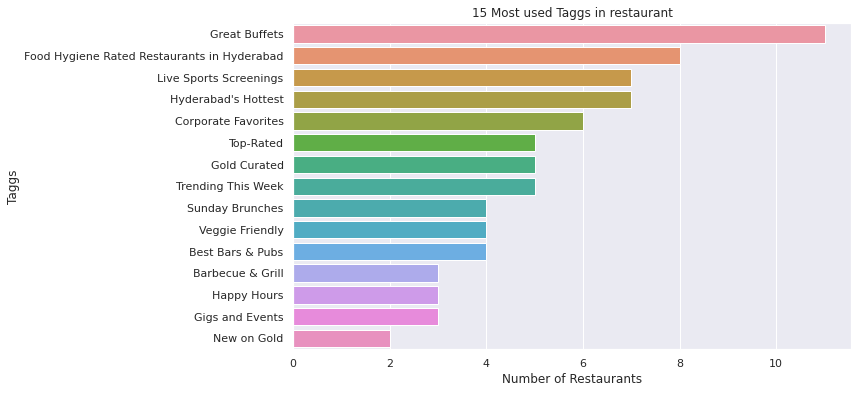

In [ ]:
# graph for most cusines served in restaurant
sns.barplot(y='Taggs',
            x="Number of Restaurants", 
            data=Collections_df, 
            order=Collections_df.sort_values('Number of Restaurants',ascending=False).Taggs[:15])
plt.title('15 Most used Taggs in restaurant')
plt.show()


(-0.5, 1399.5, 1399.5, -0.5)

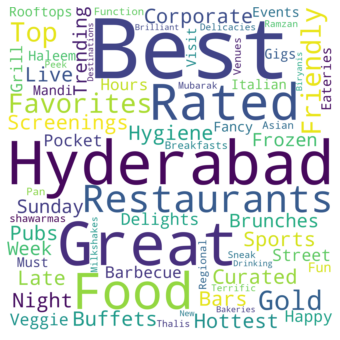

In [ ]:
#Creating the text variable

text = " ".join(name for name in Collections_df.Taggs )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

## Reviews

In [ ]:
reviews_df.head()

Restaurant              Reviewer  ... Month  Hour
0  Beyond Flavours     Rusha Chakraborty  ...   5.0  15.0
1  Beyond Flavours  Anusha Tirumalaneedi  ...   5.0  14.0
2  Beyond Flavours       Ashok Shekhawat  ...   5.0  22.0
3  Beyond Flavours        Swapnil Sarkar  ...   5.0  22.0
4  Beyond Flavours                Dileep  ...   5.0  21.0

[5 rows x 11 columns]

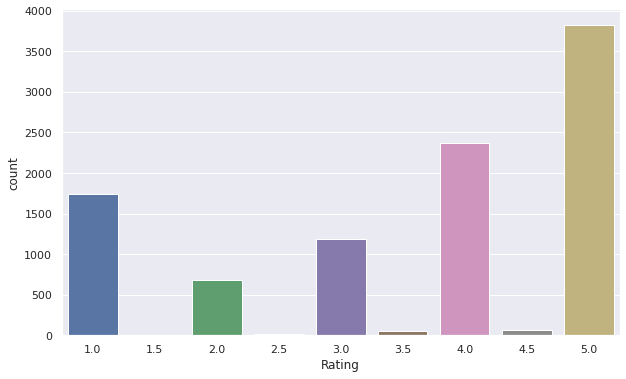

In [ ]:
sns.countplot(reviews_df.Rating)

**lets find the restaurant with best reviews**

In [ ]:
reviews_df

Restaurant              Reviewer  ... Month  Hour
0      Beyond Flavours     Rusha Chakraborty  ...   5.0  15.0
1      Beyond Flavours  Anusha Tirumalaneedi  ...   5.0  14.0
2      Beyond Flavours       Ashok Shekhawat  ...   5.0  22.0
3      Beyond Flavours        Swapnil Sarkar  ...   5.0  22.0
4      Beyond Flavours                Dileep  ...   5.0  21.0
...                ...                   ...  ...   ...   ...
9995  Chinese Pavilion      Abhishek Mahajan  ...   6.0   0.0
9996  Chinese Pavilion        Sharad Agrawal  ...   6.0  22.0
9997  Chinese Pavilion             Ramandeep  ...   6.0  10.0
9998  Chinese Pavilion       Nayana Shanbhag  ...   5.0  17.0
9999  Chinese Pavilion      Bhargava Krishna  ...   5.0  16.0

[9954 rows x 11 columns]

In [ ]:
df_rating = reviews_df.groupby(['Restaurant']).agg({'Rating':'mean','Restaurant':'count'}).rename(columns={'Restaurant':'number_of_rating'}).reset_index()
df_rating.describe()

Rating  number_of_rating
count  100.000000         100.00000
mean     3.601891          99.54000
std      0.508100           2.73924
min      2.400000          77.00000
25%      3.245000         100.00000
50%      3.613081         100.00000
75%      3.846250         100.00000
max      4.880000         100.00000

* looks like we got 100 rating for all the restaurants

Text(0.5, 1.0, 'Top 10 Restaurants by Rating')

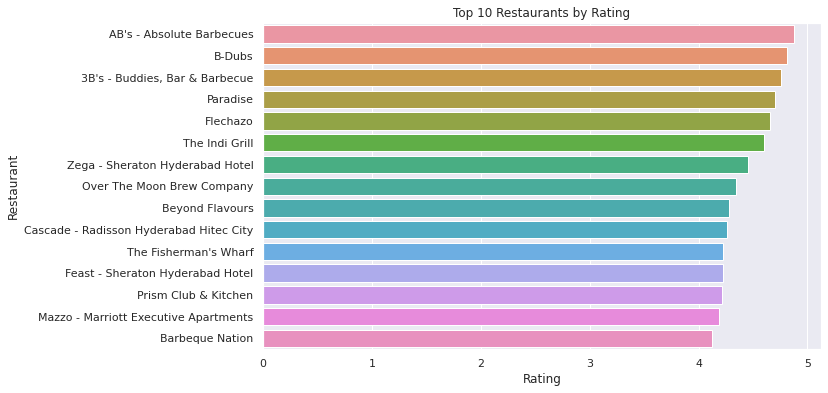

In [ ]:
sns.barplot(data=df_rating, x='Rating', y='Restaurant', order=df_rating.sort_values('Rating',ascending=False).Restaurant[:15])
plt.title('Top 10 Restaurants by Rating')

In [ ]:
df_Reviewer = reviews_df.groupby(['Reviewer']).agg({'Reviews':'sum','Followers':'sum','Rating':'mean'}).reset_index()
most_famous_reviewer=df_Reviewer[(df_Reviewer['Followers'] > 10000)&(df_Reviewer['Reviews']>100)&(df_Reviewer['Rating']>3.5)]
most_famous_reviewer

Reviewer  Reviews  Followers    Rating
56       Aanchal Khemka    945.0    11605.0  3.600000
903           Asad Rana   1086.0    12306.0  3.666667
1019          Avin Seth   1576.0    11064.0  4.500000
1285   Buddiga Sindhuri    300.0    10033.0  4.200000
1768        Food Nawabs    520.0    22129.0  4.000000
1786  Foodies Hyderabad    124.0    37976.0  4.500000
2173        Hungry Eyes    208.0    10258.0  5.000000
2816       Kunal Khanra    756.0    11440.0  4.750000
3480      Namit Agarwal   1253.0    13139.0  3.857143
4496      Rajat Goel ✳️    444.0    10149.0  4.000000
4902        Rohit Reddy    495.0    14860.0  3.900000
5460    Satwinder Singh    558.0    40230.0  3.666667
5780   Shravya Gunipudi   1544.0    10184.0  4.062500
5799   Shreyoshi Mandal   1085.0    12618.0  3.571429
6225           Srinivas    144.0    30514.0  3.714286
6744    Teja Dandigunta    432.0    10136.0  4.000000

In [ ]:
df_Reviewer.describe([0.90])

Reviews     Followers       Rating
count  7442.000000   7442.000000  7442.000000
mean     32.111664    218.183284     3.578302
std     114.700948   1222.190701     1.502574
min       0.000000      0.000000     1.000000
50%       3.000000      4.000000     4.000000
90%      67.000000    266.900000     5.000000
max    3093.000000  40230.000000     5.000000

Text(0.5, 1.0, 'Top 15 Reviewers by no of reviews')

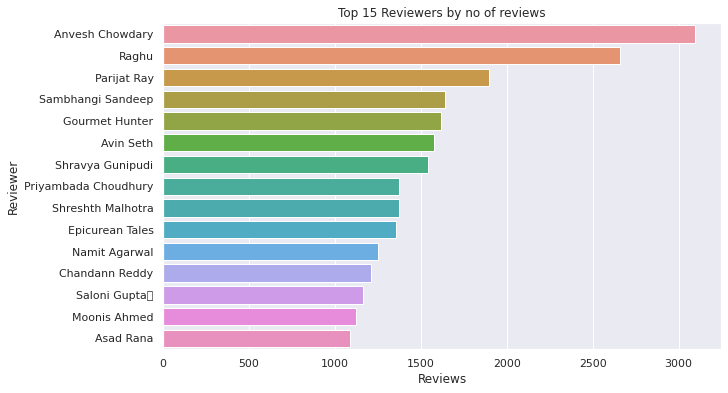

In [ ]:
sns.barplot(data=df_Reviewer, x='Reviews', y='Reviewer', order=df_Reviewer.sort_values('Reviews',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of reviews')

Text(0.5, 1.0, 'Top 15 Reviewers by no of Followers')

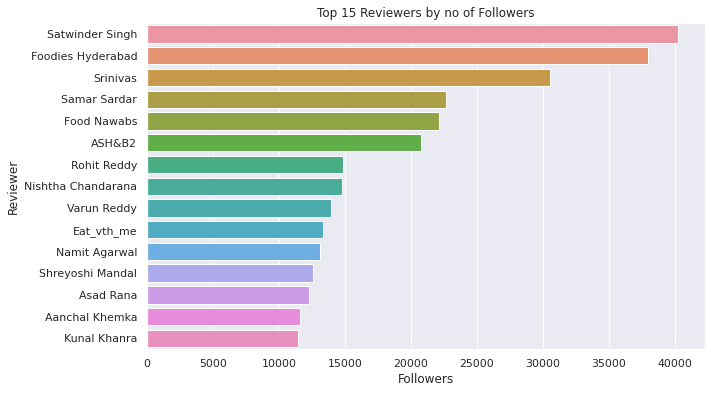

In [ ]:
sns.barplot(data=df_Reviewer, x='Followers', y='Reviewer', order=df_Reviewer.sort_values('Followers',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of Followers')

Text(0.5, 1.0, 'Top reviewers to focus on')

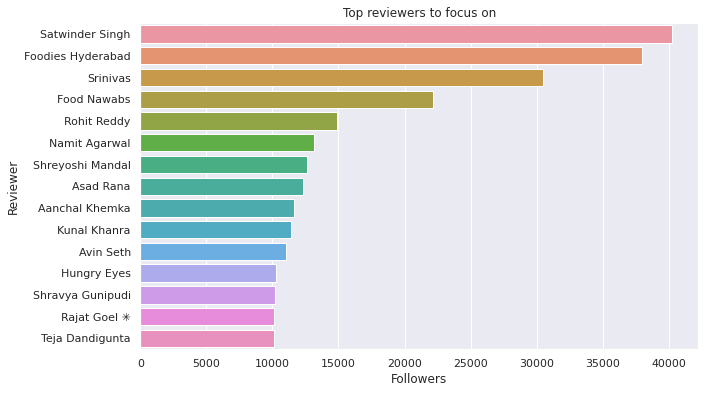

In [ ]:
most_famous_reviewer
sns.barplot(data=most_famous_reviewer, x='Followers', y='Reviewer', order=most_famous_reviewer.sort_values('Followers',ascending=False).Reviewer[:15])
plt.title('Top reviewers to focus on')

* these are the reviewer  a restaurant should focus on who have reviewed more than 100 restaurants and have followers greater than 10000 with an average rating above 3.5

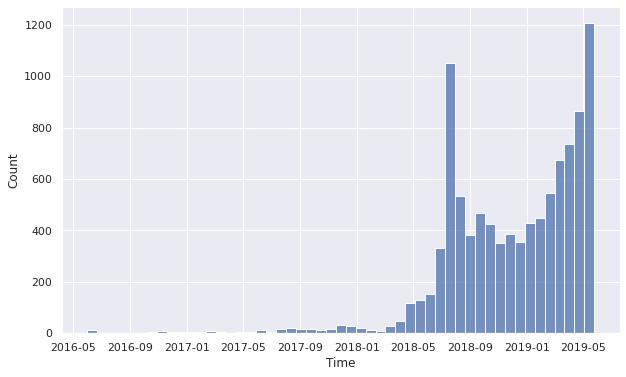

In [ ]:
sns.histplot(reviews_df.Time)

* looks like most of people started reviewing restaurant after may 2018

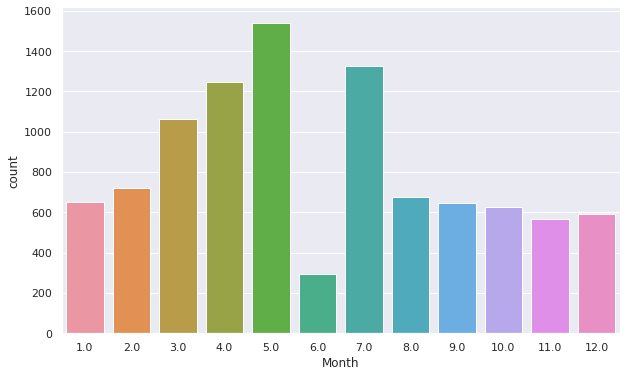

In [ ]:
sns.countplot(reviews_df.Month)

*most of the reviews are in the month of 5 and 7 month of year 

---
# Text processing 
---

In [ ]:
# storing reviews in a variable for data processing
reviews=reviews_df.Review
reviews

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9995    Madhumathi Mahajan Well to start with nice cou...
9996    This place has never disappointed us.. The foo...
9997    Bad rating is mainly because of "Chicken Bone ...
9998    I personally love and prefer Chinese Food. Had...
9999    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

In [ ]:
!pip install contractions

     |████████████████████████████████| 321 kB 6.0 MB/s 
     |████████████████████████████████| 284 kB 45.9 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85457 sha256=0d7673a9d463d080756e2dff5b58f28da1859fc052617f07dfed3de7732e5e64
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
# functions for text preprocessing 
def lower_case(text):
  '''convert the string in lower case 
  '''
  text=[x.lower() for x in text]
  return text

import string
def remove_punctuation (text):
  '''remove punctuation from the the list of strings
  '''
  text = [''.join(c for c in s if c not in string.punctuation) for s in text]
  return text

import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list 
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

def remove_all_extra_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text
  
import string
ascii_chars = set(string.printable)  # speeds things up
def remove_non_ascii_prinatble_from_list(list_of_words):
  '''removes non ascii charaters from text
  '''
  return [word for word in list_of_words 
            if all(char in ascii_chars for char in word)]

import contractions
def remove_contrations(text):
  '''shotents the words form 
  '''
  for index,x in enumerate(text):
    text[index] = contractions.fix(x)
  return text

def lemmatization_(text):
  '''converting to root words
  '''
  for index,x in enumerate(text):
    doc = nlp(x)  
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)

  return text
  

def Change_text(msg):
  '''Removing StopWord
  '''
  main_text=[word for word in no_punc.split() if word.lower() not in stop_list]
  return ' '.join(main_text)

def remove_stop_words (text):
  test_2=[]
  for x in reviews:
    test_1=[]
    for i in x.split(' '):
      if i not in stop_word_list:
        test_1.append(i)
    test_2.append(' '.join(test_1))
  return test_2

In [ ]:
#download small spacy model
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 5.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
# Print the set of spaCy's default stop words and adding common words of data set
print(nlp.Defaults.stop_words)
print(nlp.vocab['-PRON-'].is_stop)

{'namely', 'thru', 'eleven', "'m", 'see', 'than', 'mostly', 'bottom', 'also', 'only', '‘ll', 'now', 'who', "'d", 'everyone', 'between', 'some', 'so', 'first', 'himself', 'they', 'last', 'due', 'yourselves', 'everywhere', "n't", 'becomes', 'move', 'rather', 'i', 'may', 'by', 'this', 'others', 'if', 'other', 'off', 'anyone', "'ll", 'whence', 'become', 'another', 'elsewhere', 'ever', '‘d', '’s', 'because', 'one', 'her', 'them', 'back', 'anywhere', 'toward', 'really', 'whoever', 'about', 'on', 'hereby', 'nine', 'yourself', 'n‘t', 'anyway', 'towards', 'wherein', 'do', 'call', 'most', 'above', 'being', 'across', 'could', "'s", 'five', 'latterly', 'beside', 'go', 'sometimes', 'whenever', 'for', 'have', 'seeming', 'to', 'yet', 'below', 'themselves', 'here', 'already', '’ll', 'not', 'during', 'we', 'or', 'had', 'down', 'can', 'made', 'at', 'around', 'top', 'put', 're', 'latter', 'did', 'each', 'otherwise', 'was', 'might', 'without', 'whither', 'nobody', '’m', 'further', 'it', 'still', 'however'

In [ ]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('-PRON-')

# Set the stop_word tag on the lexeme
nlp.vocab['-PRON-'].is_stop = True

In [ ]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('pron')

# Set the stop_word tag on the lexeme
nlp.vocab['-PRON-'].is_stop = True

In [ ]:
# storing nlp stop wors in a list
stop_word_list=list(nlp.Defaults.stop_words)
stop_word_list

['namely',
 'thru',
 'eleven',
 "'m",
 'see',
 'than',
 'mostly',
 'pron',
 'bottom',
 'also',
 'only',
 '‘ll',
 'now',
 'who',
 "'d",
 'everyone',
 'between',
 'some',
 'so',
 'first',
 'himself',
 'they',
 'last',
 'due',
 'yourselves',
 'everywhere',
 "n't",
 'becomes',
 'move',
 'rather',
 'i',
 'may',
 'by',
 'this',
 'others',
 'if',
 'other',
 'off',
 'anyone',
 "'ll",
 'whence',
 'become',
 'another',
 'elsewhere',
 'ever',
 '‘d',
 '’s',
 'because',
 'one',
 'her',
 'them',
 'back',
 'anywhere',
 'toward',
 'really',
 'whoever',
 'about',
 'on',
 'hereby',
 'nine',
 'yourself',
 'n‘t',
 'anyway',
 'towards',
 'wherein',
 'do',
 'call',
 'most',
 'above',
 'being',
 'across',
 'could',
 "'s",
 'five',
 'latterly',
 'beside',
 'go',
 'sometimes',
 'whenever',
 'for',
 'have',
 'seeming',
 'to',
 'yet',
 'below',
 'themselves',
 'here',
 'already',
 '’ll',
 'not',
 'during',
 'we',
 'or',
 'had',
 'down',
 'can',
 'made',
 'at',
 'around',
 'top',
 'put',
 're',
 'latter',
 'did',

In [ ]:
'''
convert the string in lower case, remove punctuation, non leters(numbers, emoji etc), 
extra spaces, and non ascii characters, lemmatization and removing stop words
'''
reviews=lower_case(reviews)
reviews=remove_punctuation(reviews)
reviews=remove_non_leters(reviews)
reviews=remove_all_extra_spaces(reviews)
reviews=remove_non_ascii_prinatble_from_list(reviews)
reviews=remove_contrations(reviews)
reviews=lemmatization_(reviews)
reviews=remove_stop_words(reviews)

In [ ]:
all_words=' '.join(reviews)
all_words

'ambience good food good saturday lunch cost effective good place sate brunch chill friend parent waiter souman das courteous helpful ambience good pleasant evening service prompt food good good experience souman da kudo service try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta music background amazing soumen das arun great guy behavior sincerety good food course like visit place food goodwe order kodi drumstick basket mutton biryani good thank pradeep serve enjoy ambience good ambiance good service good food apradeecp subro good service food good papiya good hostess ur caption good star restaurant nice place ambience different food order tasty service gud worth visit reasonable visit place read review finally visit placeambience good come food crispy corn nice tawa fish ok basket biryani disappoint biryani ok flattering claim staff polite prompt especially pradeep suman excellent food specially like spicy food courteous staff shubro

In [ ]:
reviews

['ambience good food good saturday lunch cost effective good place sate brunch chill friend parent waiter souman das courteous helpful',
 'ambience good pleasant evening service prompt food good good experience souman da kudo service',
 'try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta music background amazing',
 'soumen das arun great guy behavior sincerety good food course like visit place',
 'food goodwe order kodi drumstick basket mutton biryani good thank pradeep serve enjoy ambience good',
 'ambiance good service good food apradeecp subro good service food good papiya good hostess ur caption good star restaurant',
 'nice place ambience different food order tasty service gud worth visit reasonable visit place',
 'read review finally visit placeambience good come food crispy corn nice tawa fish ok basket biryani disappoint biryani ok flattering claim staff polite prompt especially pradeep suman',
 'excellent food specially like 

In [ ]:
# storing the reviews in a feature of df
reviews_df['Reviews']=reviews
reviews_df.head()

Restaurant              Reviewer  ... Month  Hour
0  Beyond Flavours     Rusha Chakraborty  ...   5.0  15.0
1  Beyond Flavours  Anusha Tirumalaneedi  ...   5.0  14.0
2  Beyond Flavours       Ashok Shekhawat  ...   5.0  22.0
3  Beyond Flavours        Swapnil Sarkar  ...   5.0  22.0
4  Beyond Flavours                Dileep  ...   5.0  21.0

[5 rows x 11 columns]

In [ ]:
#function to removing words greater than 45 and less than 2
def len_less_than2(review):
  review=" ".join([i for i in review.split() if len(i)>2])
  review=" ".join([i for i in review.split() if len(i)<=45])
  return review

In [ ]:
#removing words greater than 45 and less than 2
reviews_df['Reviews']=reviews_df['Reviews'].apply(lambda x:len_less_than2(x))

In [ ]:
reviews_df

Restaurant              Reviewer  ... Month  Hour
0      Beyond Flavours     Rusha Chakraborty  ...   5.0  15.0
1      Beyond Flavours  Anusha Tirumalaneedi  ...   5.0  14.0
2      Beyond Flavours       Ashok Shekhawat  ...   5.0  22.0
3      Beyond Flavours        Swapnil Sarkar  ...   5.0  22.0
4      Beyond Flavours                Dileep  ...   5.0  21.0
...                ...                   ...  ...   ...   ...
9995  Chinese Pavilion      Abhishek Mahajan  ...   6.0   0.0
9996  Chinese Pavilion        Sharad Agrawal  ...   6.0  22.0
9997  Chinese Pavilion             Ramandeep  ...   6.0  10.0
9998  Chinese Pavilion       Nayana Shanbhag  ...   5.0  17.0
9999  Chinese Pavilion      Bhargava Krishna  ...   5.0  16.0

[9954 rows x 11 columns]

In [ ]:
# droping the unview column
reviews_df=reviews_df.drop('Review',axis=1)

In [ ]:
reviews_df

Restaurant              Reviewer  Rating  ...    Year  Month  Hour
0      Beyond Flavours     Rusha Chakraborty     5.0  ...  2019.0    5.0  15.0
1      Beyond Flavours  Anusha Tirumalaneedi     5.0  ...  2019.0    5.0  14.0
2      Beyond Flavours       Ashok Shekhawat     5.0  ...  2019.0    5.0  22.0
3      Beyond Flavours        Swapnil Sarkar     5.0  ...  2019.0    5.0  22.0
4      Beyond Flavours                Dileep     5.0  ...  2019.0    5.0  21.0
...                ...                   ...     ...  ...     ...    ...   ...
9995  Chinese Pavilion      Abhishek Mahajan     3.0  ...  2016.0    6.0   0.0
9996  Chinese Pavilion        Sharad Agrawal     4.5  ...  2016.0    6.0  22.0
9997  Chinese Pavilion             Ramandeep     1.5  ...  2016.0    6.0  10.0
9998  Chinese Pavilion       Nayana Shanbhag     4.0  ...  2016.0    5.0  17.0
9999  Chinese Pavilion      Bhargava Krishna     3.5  ...  2016.0    5.0  16.0

[9954 rows x 10 columns]

---
# Performing  Clustering
---

In [ ]:
meta_df.head()

Name  ...                                            Timings
0                 Beyond Flavours  ...      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)
1                        Paradise  ...                                     11 AM to 11 PM
2                        Flechazo  ...              11:30 AM to 4:30 PM, 6:30 PM to 11 PM
3  Shah Ghouse Hotel & Restaurant  ...                                    12 Noon to 2 AM
4      Over The Moon Brew Company  ...  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

[5 rows x 6 columns]

In [ ]:
# converting the cuisines to lower case
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x : x.lower())

In [ ]:
cuisine_df=meta_df.loc[:,['Name','Cost','Cuisines']]

In [ ]:
cuisine_df.head()

Name  ...                                           Cuisines
0                 Beyond Flavours  ...  chinese, continental, kebab, european, south i...
1                        Paradise  ...                     biryani, north indian, chinese
2                        Flechazo  ...       asian, mediterranean, north indian, desserts
3  Shah Ghouse Hotel & Restaurant  ...  biryani, north indian, chinese, seafood, bever...
4      Over The Moon Brew Company  ...  asian, continental, north indian, chinese, med...

[5 rows x 3 columns]

In [ ]:
# spliting the cuisine and storing in list 
def cuisine_list(cuisines):
   all_cuisines = list(set(cuisines.split(', ')))
   return all_cuisines

In [ ]:
cuisine_df['cuisine']=cuisine_df['Cuisines'].apply(lambda x : cuisine_list(x))

In [ ]:
cuisine_df.head()

Name  ...                                            cuisine
0                 Beyond Flavours  ...  [european, north indian, continental, chinese,...
1                        Paradise  ...                   [north indian, chinese, biryani]
2                        Flechazo  ...     [desserts, asian, north indian, mediterranean]
3  Shah Ghouse Hotel & Restaurant  ...  [biryani, beverages, seafood, north indian, ch...
4      Over The Moon Brew Company  ...  [asian, mediterranean, north indian, continent...

[5 rows x 4 columns]

In [ ]:
# Transform each element of a list-like to a row 
cuisine_df=cuisine_df.explode('cuisine')
cuisine_df.head()

Name  ...       cuisine
0  Beyond Flavours  ...      european
0  Beyond Flavours  ...  north indian
0  Beyond Flavours  ...   continental
0  Beyond Flavours  ...       chinese
0  Beyond Flavours  ...         kebab

[5 rows x 4 columns]

In [ ]:
# checking unique values of cuisine
set(cuisine_df["cuisine"])

{'american',
 'andhra',
 'arabian',
 'asian',
 'bakery',
 'bbq',
 'beverages',
 'biryani',
 'burger',
 'cafe',
 'chinese',
 'continental',
 'desserts',
 'european',
 'fast food',
 'finger food',
 'goan',
 'healthy food',
 'hyderabadi',
 'ice cream',
 'indonesian',
 'italian',
 'japanese',
 'juices',
 'kebab',
 'lebanese',
 'malaysian',
 'mediterranean',
 'mexican',
 'mithai',
 'modern indian',
 'momos',
 'mughlai',
 'north eastern',
 'north indian',
 'pizza',
 'salad',
 'seafood',
 'south indian',
 'spanish',
 'street food',
 'sushi',
 'thai',
 'wraps'}

In [ ]:
cuisine_df['cuisine']

0          european
0      north indian
0       continental
0           chinese
0             kebab
           ...     
103       fast food
104       malaysian
104           asian
104         chinese
104            thai
Name: cuisine, Length: 313, dtype: object

## Brinning all the cuisines into their respective supersets spicy food, Healthy food, Fast Food,Dessert

In [ ]:
# Brinning all the cuisines into their respective supersets spicy food, Healthy food, Fast Food,Dessert
l=[]
for i in cuisine_df['cuisine']:   
  if (i=='hyderabadi')| (i=='asian')|(i=='kebab')|(i=='north indian')|(i=='modern indian')|(i=='continental')|(i=='bbq')|(i=='biryani')|(i=='indonesian')|(i=='mughlai')|(i=='malaysian'):
    l.append('spicy food')
  if (i=='andhra')|(i=='north eastern')|(i=='lebanese')|(i=='salad')|(i=='south indian')|(i=='italian')|(i=='european')|(i=='mediterranean')|(i=='american')|(i=='thai')|(i=='arabian')|(i=='seafood')|(i=='mexican')|(i=='healthy food')|(i=='goan')|(i=='spanish'):
    l.append('Healthy food')
  if (i=='momos')|(i=='street food')|(i=='cafe')|(i=='chinese')|(i=='japanese')|(i=='pizza')|(i=='wraps')|(i=='burger')|(i=='fast food')|(i=='finger food')|(i=='sushi'):
    l.append('fast food')
  if (i=='bakery')|(i=='beverages')|(i=='desserts')|(i=='juices')|(i=='ice cream')|(i=='mithai'):
    l.append('Dessert')

In [ ]:
# updating the data frame with cuisines superset
superset_cuisine=pd.DataFrame(l)
superset_cuisine.columns=['cuisine']
superset_cuisine

cuisine
0    Healthy food
1      spicy food
2      spicy food
3       fast food
4      spicy food
..            ...
308     fast food
309    spicy food
310    spicy food
311     fast food
312  Healthy food

[313 rows x 1 columns]

In [ ]:
superset_cuisine.value_counts()

cuisine     
spicy food      135
fast food        85
Healthy food     64
Dessert          29
dtype: int64

In [ ]:
# droping the cuisine feature and creating new data frame with cuisine superset
cuisine_df.reset_index(inplace=True)
cuisine_df.drop(['cuisine'],axis=1,inplace=True)
dataset=pd.concat([cuisine_df,superset_cuisine],axis=1)
dataset.drop(['index'],axis=1,inplace=True)

## Making dummies of superset cuisines

In [ ]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(dataset, columns=["cuisine"],prefix=None)

In [ ]:
dum_df

Name  ...  cuisine_spicy food
0                           Beyond Flavours  ...                   0
1                           Beyond Flavours  ...                   1
2                           Beyond Flavours  ...                   1
3                           Beyond Flavours  ...                   0
4                           Beyond Flavours  ...                   1
..                                      ...  ...                 ...
308                             Wich Please  ...                   0
309  Republic Of Noodles - Lemon Tree Hotel  ...                   1
310  Republic Of Noodles - Lemon Tree Hotel  ...                   1
311  Republic Of Noodles - Lemon Tree Hotel  ...                   0
312  Republic Of Noodles - Lemon Tree Hotel  ...                   0

[313 rows x 7 columns]

In [ ]:
cuisine=list(set(dum_df.columns)-set(['Name','Cost','Cuisines']))

In [ ]:
cluster_df=dum_df.groupby(['Name','Cost','Cuisines'])[cuisine].sum().reset_index()

## Made dummies on the basis of cuisine_Dessert, cuisine_spicy food, cuisine_fast food, cuisine_Healthy food

In [ ]:
cluster_df.head()

Name  Cost  ... cuisine_fast food  cuisine_Dessert
0               10 Downing Street  1900  ...                 1                0
1                        13 Dhaba   450  ...                 0                0
2  3B's - Buddies, Bar & Barbecue  1100  ...                 0                0
3       AB's - Absolute Barbecues  1500  ...                 0                0
4               Absolute Sizzlers   750  ...                 1                0

[5 rows x 7 columns]

In [ ]:
cluster_data=cluster_df.drop(['Name','Cuisines'],axis=1)

In [ ]:
cluster_data.head()

Cost  cuisine_Healthy food  ...  cuisine_fast food  cuisine_Dessert
0  1900                     0  ...                  1                0
1   450                     0  ...                  0                0
2  1100                     2  ...                  0                0
3  1500                     2  ...                  0                0
4   750                     1  ...                  1                0

[5 rows x 5 columns]

In [ ]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Cost                  105 non-null    int64
 1   cuisine_Healthy food  105 non-null    uint8
 2   cuisine_spicy food    105 non-null    uint8
 3   cuisine_fast food     105 non-null    uint8
 4   cuisine_Dessert       105 non-null    uint8
dtypes: int64(1), uint8(4)
memory usage: 1.4 KB


## Standardizing each of the features in the clusters

In [ ]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cluster_data_sc=sc.fit_transform(cluster_data)
cluster_data_sc

array([[ 2.04558104, -0.79975012,  0.71969146,  0.26513915, -0.45323567],
       [-0.81035397, -0.79975012, -0.28787658, -1.12684139, -0.45323567],
       [ 0.46989276,  1.82442995, -0.28787658, -1.12684139, -0.45323567],
       [ 1.2577369 ,  1.82442995, -0.28787658, -1.12684139, -0.45323567],
       [-0.21947087,  0.51233992, -0.28787658,  0.26513915, -0.45323567],
       [-0.21947087,  0.51233992,  1.72725951,  0.26513915, -0.45323567],
       [-0.51491242,  1.82442995, -1.29544463,  1.6571197 , -0.45323567],
       [-1.40123708, -0.79975012, -1.29544463, -1.12684139,  2.82881571],
       [-0.71187346, -0.79975012,  0.71969146,  0.26513915, -0.45323567],
       [ 1.45469793, -0.79975012, -0.28787658, -1.12684139, -0.45323567],
       [-0.21947087, -0.79975012,  1.72725951,  0.26513915, -0.45323567],
       [-1.30275656, -0.79975012, -0.28787658, -1.12684139, -0.45323567],
       [ 1.45469793,  0.51233992, -1.29544463, -1.12684139, -0.45323567],
       [-0.31795139,  1.82442995,  0.7

## KMEANS Clustering for making clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  silhouette_score

In [ ]:
# finding best cluster bu error rate
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(cluster_data_sc)
    sse.append(km.inertia_)

 ## Using Elbow Analysis determining optimal clusters

In [ ]:
# finding best clusters by error rate
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit_transform(cluster_data_sc)
    cluster_errors.append( clusters.inertia_ )
    
cluster_errors

[524.9999999999999,
 382.26780687385883,
 296.33728585144047,
 255.17585016952995,
 223.36993116628736,
 201.1715458041008,
 182.11068498454907,
 169.71149740875174,
 152.9154303853798,
 136.92846957738942,
 132.8614512804612,
 121.26071898509649,
 111.35621794778365,
 108.14968394621795]

In [ ]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:9]

num_clusters  cluster_errors
0             1      525.000000
1             2      382.267807
2             3      296.337286
3             4      255.175850
4             5      223.369931
5             6      201.171546
6             7      182.110685
7             8      169.711497
8             9      152.915430

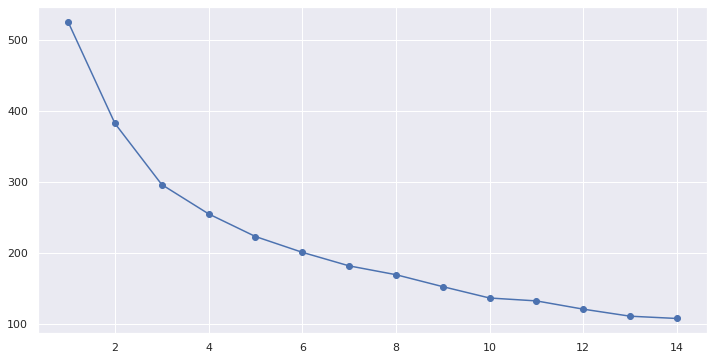

In [ ]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
#finding best cluster by silhouette score
from sklearn import metrics

k_range = range(2, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(cluster_data_sc)
    scores.append(metrics.silhouette_score(cluster_data_sc, km.labels_))

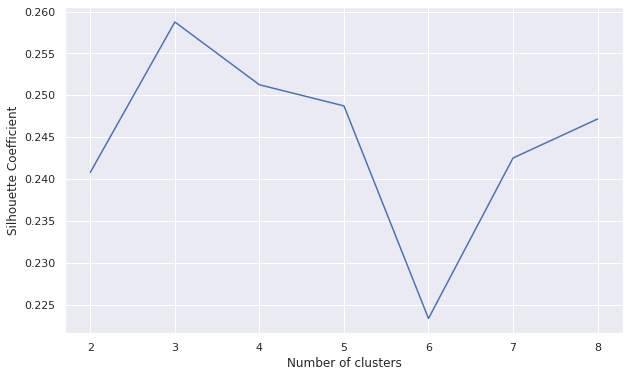

In [ ]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [ ]:
X=cluster_data_sc

For n_clusters = 2 The average silhouette_score is : 0.24120120675082216
For n_clusters = 3 The average silhouette_score is : 0.25876388277921625
For n_clusters = 4 The average silhouette_score is : 0.25126065472625286
For n_clusters = 5 The average silhouette_score is : 0.2609283466640616
For n_clusters = 6 The average silhouette_score is : 0.23516951594939842
For n_clusters = 7 The average silhouette_score is : 0.24430165440661683
For n_clusters = 8 The average silhouette_score is : 0.2588099779407198
For n_clusters = 9 The average silhouette_score is : 0.2698301179119797
For n_clusters = 10 The average silhouette_score is : 0.2864502296058876
For n_clusters = 11 The average silhouette_score is : 0.29552332576988927
For n_clusters = 12 The average silhouette_score is : 0.2872924725442904
For n_clusters = 13 The average silhouette_score is : 0.29812422489344625
For n_clusters = 14 The average silhouette_score is : 0.2845572062998351
For n_clusters = 15 The average silhouette_score is 

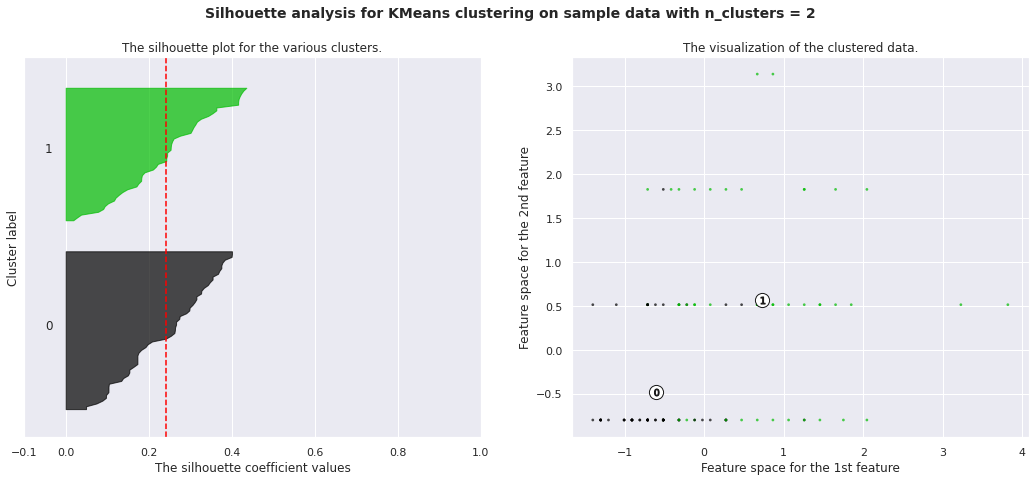

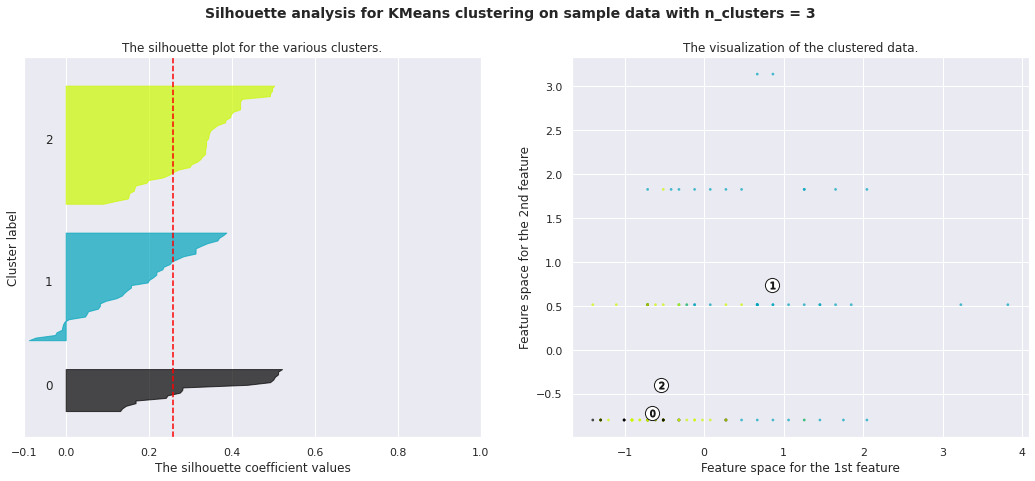

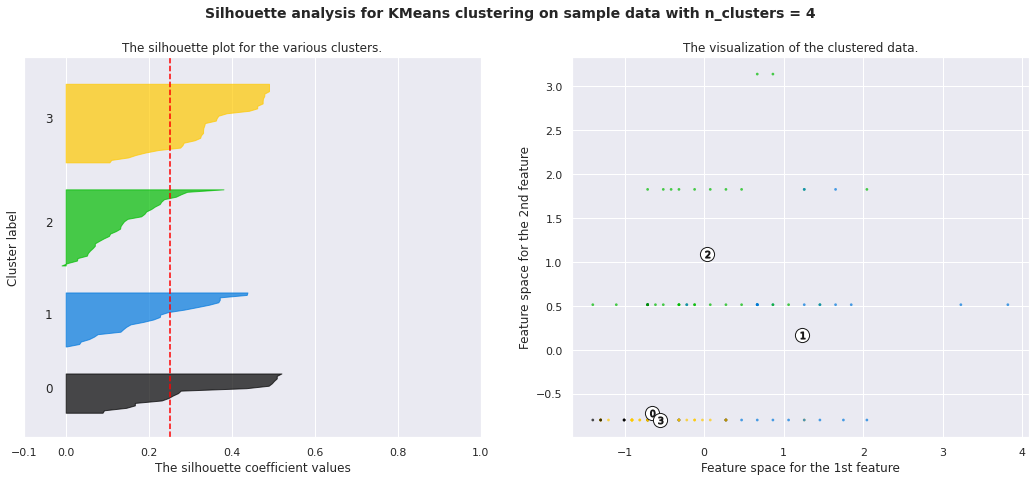

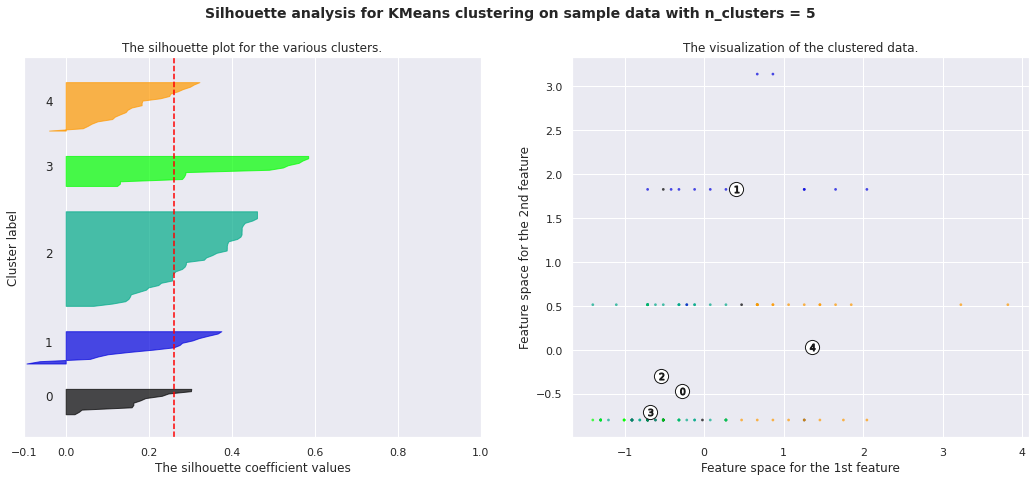

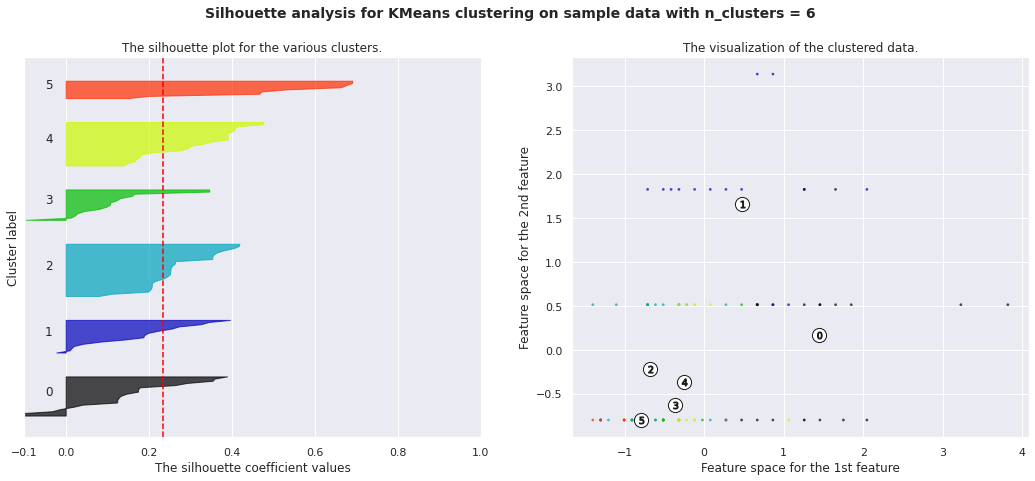

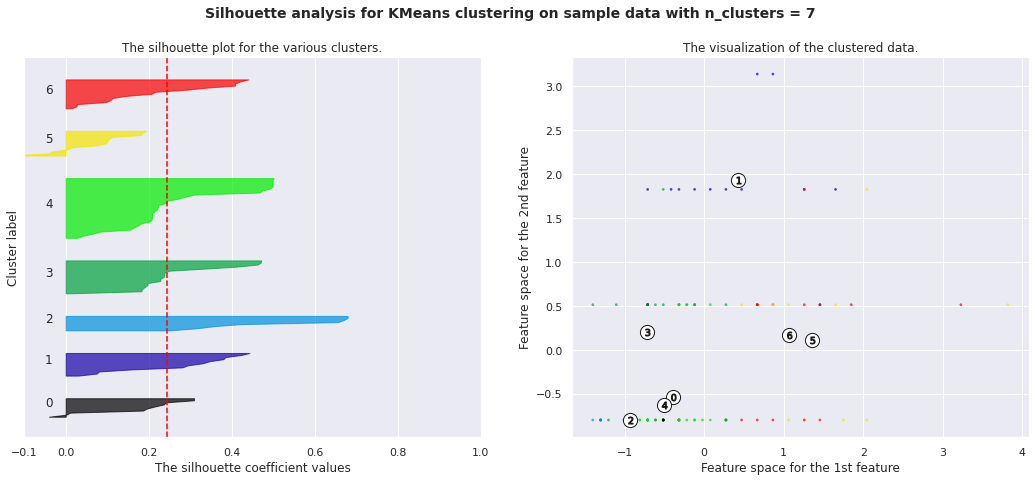

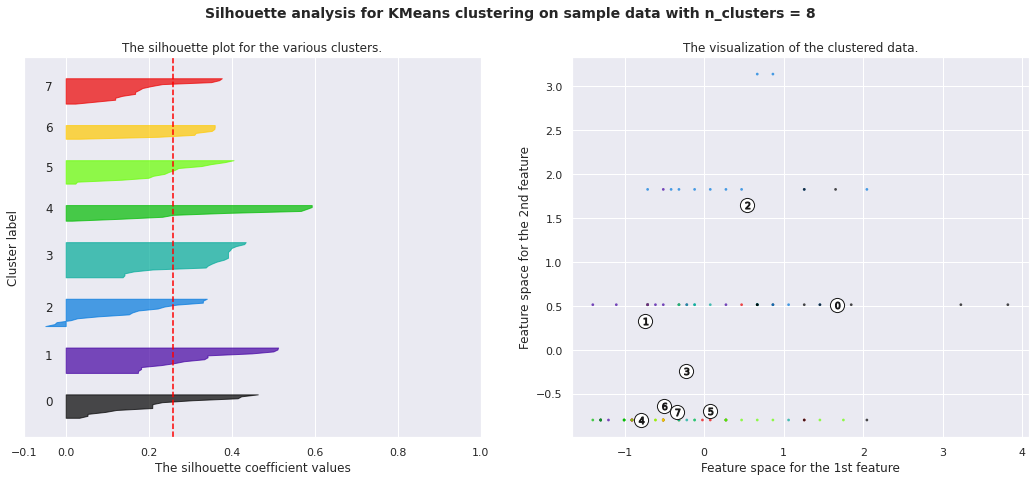

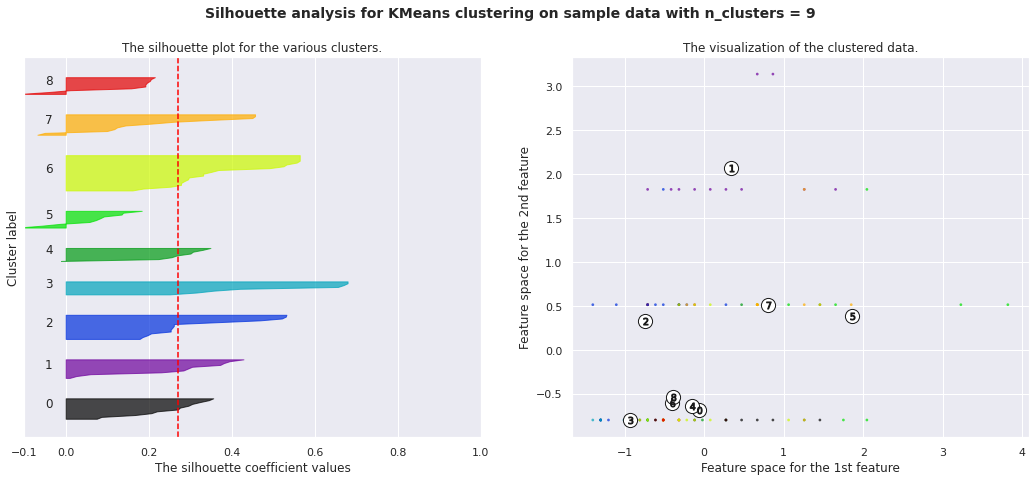

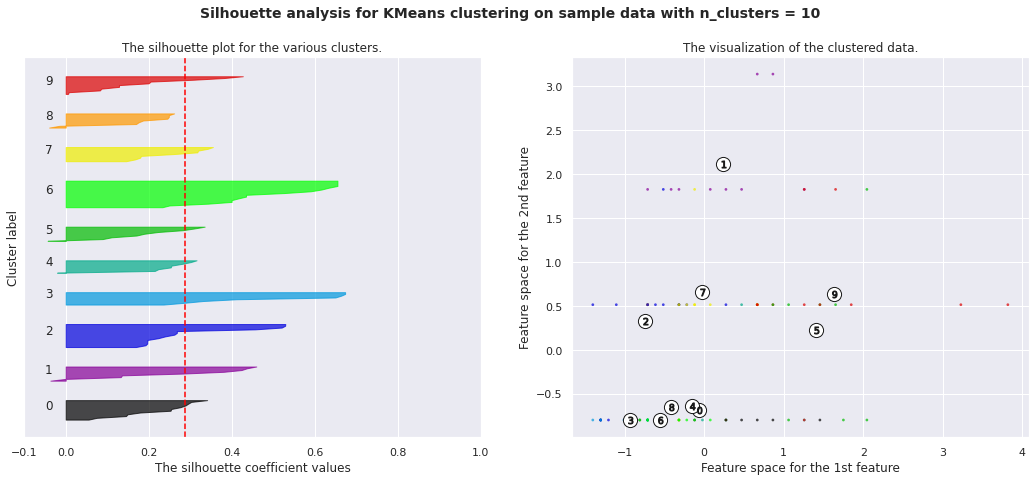

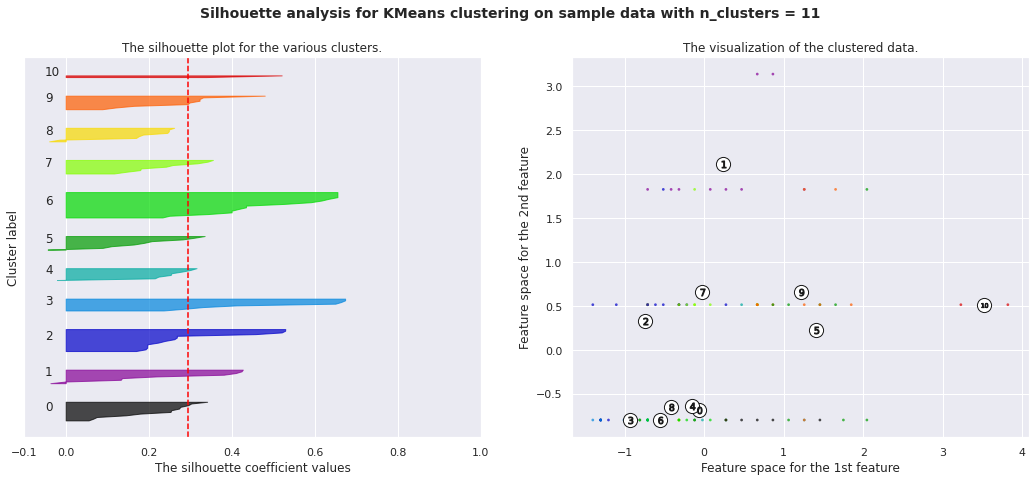

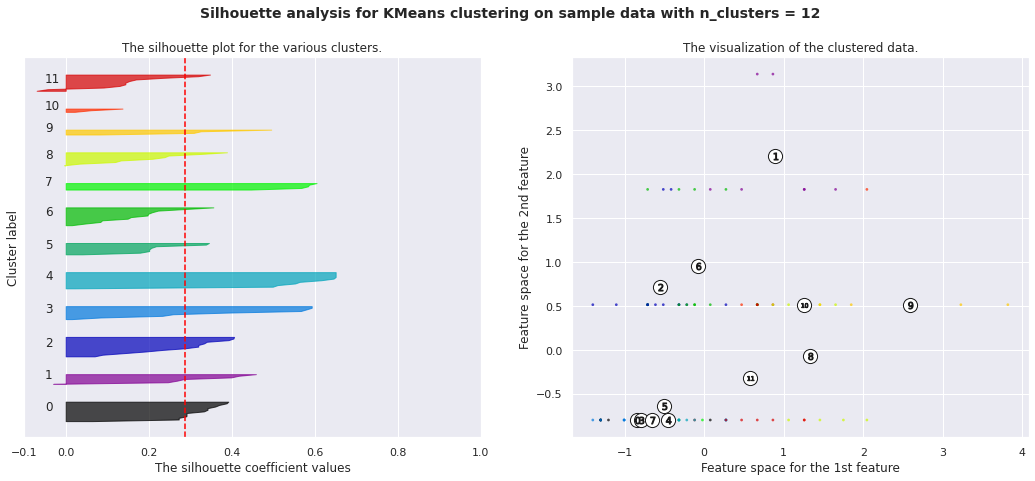

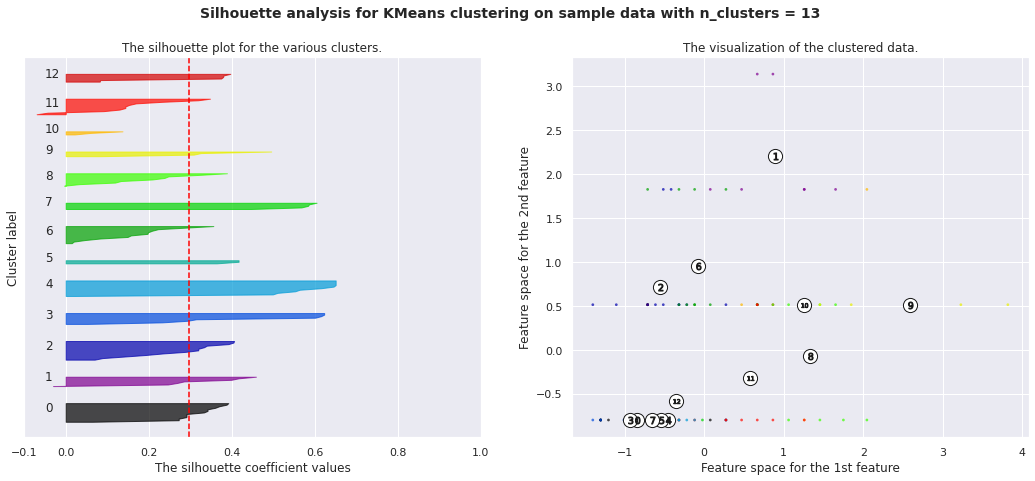

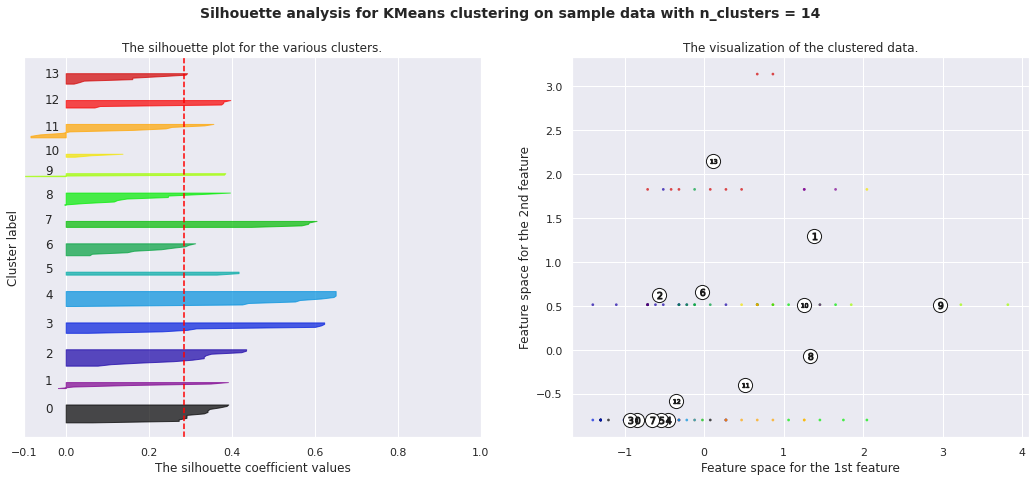

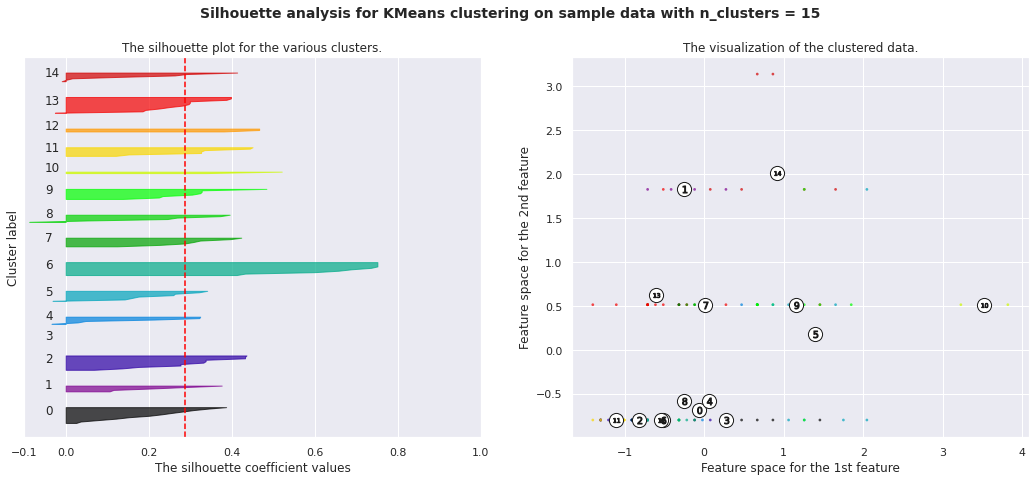

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

From silhouttee coefficients we are getting 3 as our optimum number of clusters

In [ ]:
# finding the predicted values bu kmeans 
km = KMeans(n_clusters=3, n_init=1000, max_iter=500, random_state=1)
y_predicted = km.fit_predict(cluster_data_sc)
y_predicted

array([0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2,
       2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 1, 1, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0], dtype=int32)

In [ ]:
# finding the total numbers of labes in each cluster
pd.Series(km.labels_).value_counts()

2    46
0    42
1    17
dtype: int64

In [ ]:
# updating the cluster values in df
cluster_df['cluster']=y_predicted
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(lambda x : x.split(", "))
exploded = cluster_df.explode("Cuisines")
exploded.head()

Name  Cost  ... cuisine_Dessert  cluster
0               10 Downing Street  1900  ...               0        0
0               10 Downing Street  1900  ...               0        0
0               10 Downing Street  1900  ...               0        0
1                        13 Dhaba   450  ...               0        2
2  3B's - Buddies, Bar & Barbecue  1100  ...               0        0

[5 rows x 8 columns]

expracting the unique values from diffrent clusters 

In [ ]:
exploded[exploded["cluster"]==0]['Cuisines'].unique()

array(['north indian', 'chinese', 'continental', 'mediterranean',
       'european', 'seafood', 'biryani', 'hyderabadi', 'american',
       'south indian', 'andhra', 'kebab', 'bbq', 'italian', 'asian',
       'mughlai', 'beverages', 'modern indian', 'desserts', 'spanish',
       'japanese', 'salad', 'sushi', 'mexican', 'thai', 'malaysian',
       'indonesian', 'goan', 'finger food', 'healthy food'], dtype=object)

In [ ]:
exploded[exploded["cluster"]==1]['Cuisines'].unique()

array(['ice cream', 'desserts', 'cafe', 'bakery', 'continental',
       'fast food', 'beverages', 'burger', 'biryani', 'north indian',
       'mughlai', 'juices', 'chinese', 'mithai', 'american', 'wraps'],
      dtype=object)

In [ ]:
exploded[exploded["cluster"]==2]['Cuisines'].unique()

array(['north indian', 'continental', 'american', 'chinese', 'fast food',
       'salad', 'burger', 'biryani', 'mughlai', 'asian', 'seafood',
       'momos', 'pizza', 'hyderabadi', 'japanese', 'sushi', 'finger food',
       'kebab', 'arabian', 'south indian', 'street food', 'lebanese',
       'andhra', 'thai', 'north eastern'], dtype=object)

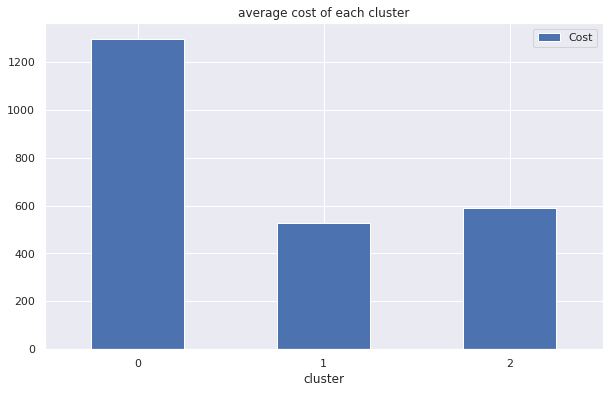

In [ ]:
# ploting average cost of each cluster
pd.DataFrame(cluster_df.groupby('cluster')['Cost'].mean()).plot(kind="bar")
plt.xticks(rotation=0)
plt.title('average cost of each cluster')
plt.show()

In [ ]:
cluster_df.loc[:,['Name','Cost','Cuisines','cluster']].head(30)

Name  ...  cluster
0                         10 Downing Street  ...        0
1                                  13 Dhaba  ...        2
2            3B's - Buddies, Bar & Barbecue  ...        0
3                 AB's - Absolute Barbecues  ...        0
4                         Absolute Sizzlers  ...        2
5                        Al Saba Restaurant  ...        0
6                       American Wild Wings  ...        2
7                                      Amul  ...        1
8                          Angaara Counts 3  ...        2
9                              Arena Eleven  ...        0
10                             Aromas@11SIX  ...        2
11                           Asian Meal Box  ...        2
12                                   B-Dubs  ...        0
13      Banana Leaf Multicuisine Restaurant  ...        0
14                          Barbeque Nation  ...        0
15                          Behrouz Biryani  ...        2
16                             Being Hungry  ...        2
17                          Beyond Flavours  ...        0
18                        Biryanis And More  ...        2
19                               Cafe Eclat  ...        1
20  Cascade - Radisson Hyderabad Hitec City  ...        0
21                         Chinese Pavilion  ...        2
22                               Club Rogue  ...        2
23     Collage - Hyatt Hyderabad Gachibowli  ...        0
24                              Cream Stone  ...        1
25                                 Delhi-39  ...        2
26                            Deli 9 Bistro  ...        1
27                               Desi Bytes  ...        2
28                             Dine O China  ...        2
29                          Diners Pavilion  ...        0

[30 rows x 4 columns]

## Herarchical Clustering

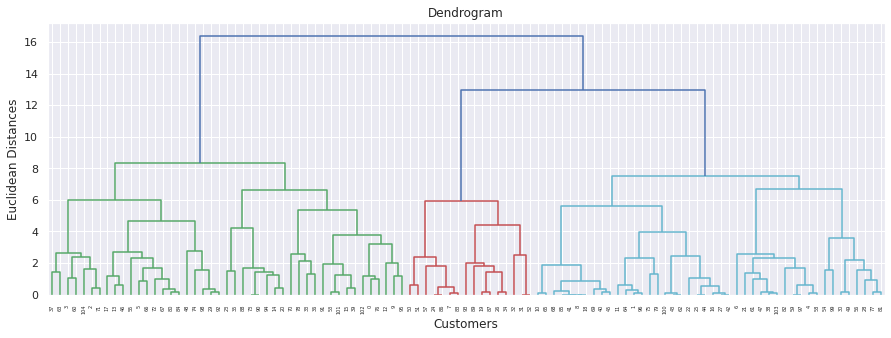

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(cluster_data_sc, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [ ]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(cluster_data_sc)

In [ ]:
cluster_df['cluster_hr']=y_hc

In [ ]:
result=cluster_df.loc[:,['Name','Cost','Cuisines','cluster','cluster_hr']]

In [ ]:
result.head(20)

Name  Cost  ... cluster  cluster_hr
0                     10 Downing Street  1900  ...       0           0
1                              13 Dhaba   450  ...       2           1
2        3B's - Buddies, Bar & Barbecue  1100  ...       0           0
3             AB's - Absolute Barbecues  1500  ...       0           0
4                     Absolute Sizzlers   750  ...       2           1
5                    Al Saba Restaurant   750  ...       0           0
6                   American Wild Wings   600  ...       2           1
7                                  Amul   150  ...       1           2
8                      Angaara Counts 3   500  ...       2           1
9                          Arena Eleven  1600  ...       0           0
10                         Aromas@11SIX   750  ...       2           1
11                       Asian Meal Box   200  ...       2           1
12                               B-Dubs  1600  ...       0           0
13  Banana Leaf Multicuisine Restaurant   700  ...       0           0
14                      Barbeque Nation  1600  ...       0           0
15                      Behrouz Biryani   600  ...       2           0
16                         Being Hungry   450  ...       2           1
17                      Beyond Flavours   800  ...       0           0
18                    Biryanis And More   500  ...       2           1
19                           Cafe Eclat   700  ...       1           2

[20 rows x 5 columns]

---
# Sentiment Analysis ( UnSupervised )
---

## Tokenization

In [ ]:
# setting tokens by TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(stop_words=stop_word_list)
transformed_reviews=tfidf.fit_transform(reviews_df['Reviews'])

## LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV

# LDA model
lda = LatentDirichletAllocation(n_components=5)
lda.fit(transformed_reviews)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
lda.components_

array([[0.20001003, 0.20000714, 0.23528591, ..., 0.76667613, 0.20052125,
        0.20000393],
       [0.20413853, 0.20152886, 0.26893828, ..., 0.20002601, 0.6104821 ,
        0.20000383],
       [0.44893398, 0.20002335, 0.20013417, ..., 0.20013453, 0.20003276,
        0.20001439],
       [0.20003458, 0.44645701, 0.20013749, ..., 0.20013417, 0.20003125,
        0.38326261],
       [0.2000129 , 0.20000899, 0.20004847, ..., 0.37133384, 0.20001182,
        0.20000515]])

In [ ]:
# checking for top 15 words in each topic
for index,topic in enumerate(lda.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['chicken', 'love', 'thank', 'staff', 'ambience', 'visit', 'taste', 'excellent', 'great', 'awesome', 'place', 'service', 'nice', 'food', 'good']


THE TOP 15 WORDS FOR TOPIC #1
['time', 'veg', 'like', 'visit', 'biryani', 'service', 'great', 'ambience', 'try', 'taste', 'order', 'chicken', 'food', 'place', 'good']


THE TOP 15 WORDS FOR TOPIC #2
['rider', 'nuts', 'rain', 'sundae', 'provide', 'goid', 'parathas', 'sarvice', 'qty', 'incomplete', 'icecream', 'stone', 'ice', 'test', 'cream']


THE TOP 15 WORDS FOR TOPIC #3
['correctly', 'overhyped', 'poha', 'miss', 'dear', 'ontime', 'leftover', 'straw', 'servicing', 'spoon', 'rahamat', 'tissue', 'agent', 'communication', 'quantity']


THE TOP 15 WORDS FOR TOPIC #4
['zomato', 'experience', 'place', 'biryani', 'restaurant', 'quality', 'taste', 'service', 'good', 'deliver', 'time', 'food', 'order', 'delivery', 'bad']




In [ ]:
!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6 MB 5.3 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=2dca5d6dc5fb591c24e7fc00b3cd5dea97d0d5900742a73c367603ea5ae96f77
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


In [ ]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [ ]:
# ploting the clusters top 30 terms 
lda_panel = pyLDAvis.sklearn.prepare(lda, transformed_reviews,tfidf,mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  48.196054
0       51.163364 -159.968018       2        1  23.166924
4      -73.144554   21.523815       3        1  18.308176
2      -66.410133 -110.606438       4        1   5.176566
3       54.417324   12.443444       5        1   5.152281, topic_info=            Term        Freq       Total Category  logprob  loglift
5551        good  652.000000  652.000000  Default  30.0000  30.0000
3496    delivery  112.000000  112.000000  Default  29.0000  29.0000
1059         bad  142.000000  142.000000  Default  28.0000  28.0000
9000        nice  174.000000  174.000000  Default  27.0000  27.0000
4924        food  357.000000  357.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
8486        miss    1.271413   20.937564   Topic5  -7.3056   0.1643
3257     cutlery    0.915848    5.887037   Topic5  -7.6336   1.1051
11368  restraunt    0.804810    2.711940   Topic5  -7.7629   1.7509
2277       cheat    0.767393    4.401877   Topic5  -7.8105   1.2189
604      anytime    0.738041    2.964565   Topic5  -7.8495   1.5752

[333 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
219        5  0.919030     agent
329        3  0.893936     allow
352        4  0.596519  alphonso
388        1  0.611399   amazing
388        2  0.368947   amazing
...      ...       ...       ...
15171      5  0.860683     yfjgz
15261      1  0.378041    zomato
15261      2  0.099485    zomato
15261      3  0.537217    zomato
15273      5  0.819376    zomoto

[515 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 3, 4])

In [ ]:
# predicting the sentiments and storing in a feature
topic_results = lda.transform(transformed_reviews)
reviews_df['sentiments']=topic_results.argmax(axis=1)
reviews_df.head()

Restaurant              Reviewer  Rating  ... Month  Hour sentiments
0  Beyond Flavours     Rusha Chakraborty     5.0  ...   5.0  15.0          1
1  Beyond Flavours  Anusha Tirumalaneedi     5.0  ...   5.0  14.0          0
2  Beyond Flavours       Ashok Shekhawat     5.0  ...   5.0  22.0          1
3  Beyond Flavours        Swapnil Sarkar     5.0  ...   5.0  22.0          0
4  Beyond Flavours                Dileep     5.0  ...   5.0  21.0          0

[5 rows x 11 columns]

In [ ]:
reviews_df['Rating'].value_counts()

5.0    3826
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [ ]:
reviews_df.shape

(9954, 11)

In [ ]:
reviews_df[reviews_df['sentiments']==4 ]['Rating'].value_counts()

1.0    1011
5.0     430
2.0     238
3.0     187
4.0     171
2.5       5
4.5       5
3.5       1
Name: Rating, dtype: int64

In [ ]:
reviews_df[reviews_df['sentiments']==3 ]['Rating'].value_counts()

5.0    31
1.0    27
3.0    12
4.0    12
2.0    10
Name: Rating, dtype: int64

In [ ]:
reviews_df[reviews_df['sentiments']==2 ]['Rating'].value_counts()

5.0    41
1.0    27
3.0    12
4.0     8
2.0     3
Name: Rating, dtype: int64

In [ ]:
reviews_df[reviews_df['sentiments']==1 ]['Rating'].value_counts()

4.0    1588
5.0    1399
3.0     774
1.0     510
2.0     357
4.5      52
3.5      41
2.5      11
1.5       7
Name: Rating, dtype: int64

In [ ]:
reviews_df[reviews_df['sentiments']==0 ]['Rating'].value_counts()

5.0    1925
4.0     594
3.0     207
1.0     160
2.0      76
4.5      12
3.5       5
2.5       3
1.5       2
Name: Rating, dtype: int64

In [ ]:
reviews_df[reviews_df['Rating']==3].shape

(1192, 11)

observation : 

## Non-negative matrix Factorization

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf_model = NMF(n_components=5,random_state=42)

In [ ]:
nmf_model.fit(transformed_reviews)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [ ]:
# top most frequnt word used in each topic
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['packing', 'polite', 'test', 'quality', 'quantity', 'price', 'ambiance', 'ambience', 'spicy', 'burger', 'job', 'food', 'taste', 'service', 'good']


THE TOP 15 WORDS FOR TOPIC #1
['serve', 'excellent', 'try', 'friend', 'amazing', 'love', 'time', 'awesome', 'staff', 'visit', 'ambience', 'great', 'service', 'place', 'food']


THE TOP 15 WORDS FOR TOPIC #2
['music', 'sarvice', 'ambiance', 'service', 'overall', 'family', 'hangout', 'enjoy', 'thank', 'staff', 'ambience', 'place', 'friend', 'friendly', 'nice']


THE TOP 15 WORDS FOR TOPIC #3
['zomato', 'thank', 'person', 'awesome', 'guy', 'super', 'excellent', 'order', 'boy', 'quick', 'late', 'deliver', 'fast', 'time', 'delivery']


THE TOP 15 WORDS FOR TOPIC #4
['spicy', 'piece', 'try', 'paneer', 'veg', 'restaurant', 'like', 'quality', 'rice', 'quantity', 'biryani', 'bad', 'order', 'taste', 'chicken']




In [ ]:
topic_results = nmf_model.transform(transformed_reviews)

In [ ]:
reviews_df['sentiments']=topic_results.argmax(axis=1)

In [ ]:
reviews_df[reviews_df['sentiments']==4]['Rating'].value_counts()

1.0    1087
4.0     671
5.0     536
3.0     467
2.0     361
3.5      25
4.5      18
1.5       7
2.5       6
Name: Rating, dtype: int64

In [ ]:
reviews_df[reviews_df['sentiments']==3 ]['Rating'].value_counts()

5.0    285
1.0     98
4.0     66
3.0     38
2.0     25
4.5      3
3.5      2
2.5      1
Name: Rating, dtype: int64

In [ ]:
reviews_df.Reviews[1]

'ambience good pleasant evening service prompt food good good experience souman kudo service'

In [ ]:
reviews_df.head()

Restaurant              Reviewer  Rating  ... Month  Hour sentiments
0  Beyond Flavours     Rusha Chakraborty     5.0  ...   5.0  15.0          0
1  Beyond Flavours  Anusha Tirumalaneedi     5.0  ...   5.0  14.0          0
2  Beyond Flavours       Ashok Shekhawat     5.0  ...   5.0  22.0          1
3  Beyond Flavours        Swapnil Sarkar     5.0  ...   5.0  22.0          1
4  Beyond Flavours                Dileep     5.0  ...   5.0  21.0          0

[5 rows x 11 columns]

In [ ]:
reviews_df['sentiments']=reviews_df['sentiments'].apply( lambda x : 'negative' if x==4 or x==3 else 'positive')

In [ ]:
reviews_df[reviews_df['sentiments']=='negative']["Rating"].value_counts()

1.0    1185
5.0     821
4.0     737
3.0     505
2.0     386
3.5      27
4.5      21
1.5       7
2.5       7
Name: Rating, dtype: int64

In [ ]:
reviews_df[reviews_df['sentiments']=='positive']["Rating"].value_counts()

5.0    3005
4.0    1636
3.0     687
1.0     550
2.0     298
4.5      48
3.5      20
2.5      12
1.5       2
Name: Rating, dtype: int64

---
# Sentiment Analysis (Superviesd)
---

---
## data Processing
---

In [ ]:
def sentiment(rating):
  if rating >=3.5:
    return 0 
    # positive sentiment
  else:
    return 1
    # neagative sentiment 

In [ ]:
sentiment_df=reviews_df[['Reviews','Rating']]

In [ ]:
sentiment_df['sentiment']=sentiment_df['Rating'].apply(lambda x:sentiment(x))
sentiment_df

Reviews  Rating  sentiment
0     ambience good food good saturday lunch cost ef...     5.0          0
1     ambience good pleasant evening service prompt ...     5.0          0
2     try great food great ambience thnx service pra...     5.0          0
3     soumen das arun great guy behavior sincerety g...     5.0          0
4     food goodwe order kodi drumstick basket mutton...     5.0          0
...                                                 ...     ...        ...
9995  madhumathi mahajan start nice courteous server...     3.0          1
9996  place disappoint food courteous staff serene a...     4.5          0
9997  bad rating mainly chicken bone find veg food a...     1.5          1
9998  personally love prefer chinese food couple tim...     4.0          0
9999  check try delicious chinese food nonveg lunche...     3.5          0

[9954 rows x 3 columns]

In [ ]:
# defining blank list for the input of scores of models
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]
model_train_time=[]


In [ ]:
# making a function to train the model and evaluate the model
def train_and_score (model,X_test,X_train,y_test,y_train, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  #storing the start time of model training
  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  #storing the time when the model ended trining 
  stop = time.time()
  #calculating the total time taken for model training 
  time_min=round((stop - start)/60,4)
  # printing the time taken to train the model
  print(f"Training time: {time_min}min")
  model_train_time.append(time_min)
  
  

  # finding the best parameters of the model if any 
  if best_parameter==True:
    # using try except method to avoid any error
    try:
      print("The best parameters found out to be :" ,model.best_params_)
    except:
      pass
  # finding best score of the model 
  if best_score==True:
    try:
      print(" \nwhere negative mean squared error is: ", model.best_score_,'\n')
    except:
      pass


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  def score (actual,predicted,append=True):
    '''
    calcuating diffrent score matrix of the model
    '''
    # calculating accuracy score
    accuracy = accuracy_score(actual,predicted)
    # calculating precision score
    precision = precision_score(actual,predicted)
    # calculating recall score
    recall = recall_score(actual,predicted)
    # calculating f1_score score
    f1 = f1_score(actual,predicted)
    # calculating roc_auc_score score
    roc= roc_auc_score(actual,predicted)
    
    # printing all the scores
    print("\tThe accuracy is ", accuracy)
    print("\tThe precision is ", precision)
    print("\tThe recall is ", recall)
    print("\tThe f1 is ", f1)
    print('\tthe auc  is ',roc,'\n')
    print('\t\t\t\tclassification report\n','*'*80,'\n',classification_report(actual,predicted))
    

    # uploading all the score of the matrix in in the list 
    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass
# printing the score by the help of coustom score function
  # for train set
  print('\t\t\t\tscore matrix for train')
  print('*'*80)
  score(y_train,y_pred_train,False)
  print('\n')
  # for test set
  print('\t\t\t\tscore matrix for test')
  print('*'*80)
  score(y_test,y_pred_test)


In [ ]:
# creating x and y varibles for independent and dependent variable
x = sentiment_df['Reviews']
y = sentiment_df['sentiment']

In [ ]:
# spliting the data into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=sentiment_df['sentiment'])

In [ ]:
# creating topkens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer("english",min_df=0.01,max_df=0.95)
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

---
## MultinomialNB
---

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# creating MultinomialNB model
model = MultinomialNB()
# training and evaluating the MultinomialNB
train_and_score(model,X_test,X_train,y_test,y_train)

Training time: 0.0001min
				score matrix for train
********************************************************************************
	The accuracy is  0.8438044206296048
	The precision is  0.8799222168206126
	The recall is  0.6632466104800293
	The f1 is  0.7563727538654409
	the auc  is  0.8055464471319065 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      4736
           1       0.88      0.66      0.76      2729

    accuracy                           0.84      7465
   macro avg       0.85      0.81      0.82      7465
weighted avg       0.85      0.84      0.84      7465



				score matrix for test
********************************************************************************
	The accuracy is  0.8159903575733226
	The precision is  0.8304093567251462
	The recall is  0.6241758241758242
	The f1 is  0.7126725219573399
	the

---
## Logestic Regrestion
---

In [ ]:
# creating DecisionTree model
# training and evaluating the DecisionTree

In [ ]:
from sklearn.linear_model import LogisticRegression
# creating LogisticRegression model
log_reg = LogisticRegression()

In [ ]:
# finding the best parameters for LogisticRegression by gridsearchcv
param_dict = {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l1', 'l2'],'max_iter':[1000]} 
log_reg_grid = GridSearchCV(log_reg, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

In [ ]:
# training and evaluating the DecisionTree
train_and_score(log_reg_grid, X_test, X_train, y_test, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    1.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.0s finished
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is d

Training time: 0.0554min
The best parameters found out to be : {'C': 100, 'max_iter': 1000, 'penalty': 'l2'}
 
where negative mean squared error is:  0.7779500621702456 

				score matrix for train
********************************************************************************
	The accuracy is  0.8754186202277294
	The precision is  0.8429279451010293
	The recall is  0.810186881641627
	The f1 is  0.8262331838565022
	the auc  is  0.861596819199192 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      4736
           1       0.84      0.81      0.83      2729

    accuracy                           0.88      7465
   macro avg       0.87      0.86      0.86      7465
weighted avg       0.87      0.88      0.87      7465



				score matrix for test
********************************************************************************
	

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring(

---
## Desision Tree
---

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=45,criterion='entropy')

# training and evaluating the DecisionTree
train_and_score(DecisionTree,X_test, X_train, y_test, y_train)

Training time: 0.0036min
				score matrix for train
********************************************************************************
	The accuracy is  0.7926322839919625
	The precision is  0.7034102652428522
	The recall is  0.7482594356907292
	The f1 is  0.7251420454545454
	the auc  is  0.7832302246021214 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.85      0.82      0.83      4736
           1       0.70      0.75      0.73      2729

    accuracy                           0.79      7465
   macro avg       0.78      0.78      0.78      7465
weighted avg       0.80      0.79      0.79      7465



				score matrix for test
********************************************************************************
	The accuracy is  0.7577340297308156
	The precision is  0.6527363184079602
	The recall is  0.7208791208791209
	The f1 is  0.685117493472585
	the 

---
## Random forest
---

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# creating RandomForestRegressor model
rfc=RandomForestClassifier()

In [ ]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [ ]:
# finding the best parameters for knn_model by gridsearchcv
grid_values_rf = {'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
rfc_grid = GridSearchCV(estimator=rfc,param_grid = grid_values_rf, scoring='recall',cv=5,verbose=5,n_jobs=-1)

In [ ]:
# training and evaluating the Random Forest Regressor
train_and_score(rfc_grid,X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   19.7s finished


Training time: 0.3403min
The best parameters found out to be : {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 100}
 
where negative mean squared error is:  0.5208791208791209 

				score matrix for train
********************************************************************************
	The accuracy is  0.8738449176376054
	The precision is  0.9760383386581469
	The recall is  0.6714285714285714
	The f1 is  0.7955729166666666
	the auc  is  0.8309644440423414 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1579
           1       0.98      0.67      0.80       910

    accuracy                           0.87      2489
   macro avg       0.91      0.83      0.85      2489
weighted avg       0.89      0.87      0.87      2489



				score matrix for test
***************************************************************

---
## XGboost
---

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgbc=XGBClassifier()

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgbc_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgbc_grid=GridSearchCV(estimator=xgbc,param_grid=xgbc_param,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [ ]:
# training and evaluating the xgb_grid
train_and_score(xgbc_grid,X_test, X_train, y_test, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.4min finished


Training time: 1.5509min
The best parameters found out to be : {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 125}
 
where negative mean squared error is:  0.7486236535741487 

				score matrix for train
********************************************************************************
	The accuracy is  0.9604822505023443
	The precision is  0.9441605839416058
	The recall is  0.9479662880175889
	The f1 is  0.9460596087036021
	the auc  is  0.9578302723871729 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      4736
           1       0.94      0.95      0.95      2729

    accuracy                           0.96      7465
   macro avg       0.96      0.96      0.96      7465
weighted avg       0.96      0.96      0.96      7465



				score matrix for test
***************************************************************

---
## lightGBM
---

In [ ]:
import lightgbm as lgb

In [ ]:
lgbc=lgb.LGBMClassifier()

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
lgbc_para={'n_estimators': [100,125,150],'max_depth': [15,20,25]}
lgbc_grid=GridSearchCV(estimator=lgbc,param_grid=lgbc_para,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [ ]:
# training and evaluating the lgbr_grid
train_and_score(lgbc_grid,X_test, X_train, y_test, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   45.4s finished


Training time: 0.802min
The best parameters found out to be : {'max_depth': 20, 'n_estimators': 100}
 
where negative mean squared error is:  0.7684095149441684 

				score matrix for train
********************************************************************************
	The accuracy is  0.9300736771600804
	The precision is  0.919422272900038
	The recall is  0.8864052766581165
	The f1 is  0.9026119402985074
	the auc  is  0.9208208815723016 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      4736
           1       0.92      0.89      0.90      2729

    accuracy                           0.93      7465
   macro avg       0.93      0.92      0.92      7465
weighted avg       0.93      0.93      0.93      7465



				score matrix for test
********************************************************************************
	The acc

---
## score matrix for all the models 
---

In [ ]:
#creating dictionary to store all the metrices 
dict={'accuracy':model_accuracy,'precision':model_precision,'recall':model_recall,'f1':model_f1_score,'roc_auc':model_roc_auc_score,'train_time':model_train_time}

In [ ]:
# list of all models
model_name=['MultinomialNB','Logestic Regrestion','Desision Tree','Random forest','XGboost','lightGBM',]

In [ ]:
# converting dictionary to dataframe
matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)

In [ ]:
# taking the transpose of the dataframe to make it more visual appealing
matrix_df=matrix_df.transpose().reset_index().rename(columns={'index':'Models'})

In [ ]:
matrix_df

Models  accuracy  precision  ...        f1   roc_auc  train_time
0        MultinomialNB  0.815990   0.830409  ...  0.712673  0.775356      0.0001
1  Logestic Regrestion  0.834070   0.786621  ...  0.767586  0.816144      0.0554
2        Desision Tree  0.757734   0.652736  ...  0.685117  0.749927      0.0036
3        Random forest  0.811788   0.913750  ...  0.675445  0.753294      0.3403
4              XGboost  0.839293   0.802133  ...  0.771950  0.819096      1.5509
5             lightGBM  0.840498   0.799300  ...  0.775325  0.821909      0.8020

[6 rows x 7 columns]

In [ ]:
matrix_df.train_time.sum()

2.7523

## ROC curve for all the models
---

In [ ]:
# finding the best parameters for all the models
log_reg_best=log_reg_grid.best_estimator_
rfc_best=rfc_grid.best_estimator_
xgbc_best=xgbc_grid.best_estimator_
lgbc_best=lgbc_grid.best_estimator_


In [ ]:
# predicting the sentiment by all models
y_preds_proba_mnbc = model.predict_proba(X_test)[::,1]
y_preds_proba_lr = log_reg_best.predict_proba(X_test)[::,1]
y_preds_proba_dtc = DecisionTree.predict_proba(X_test)[::,1]
y_preds_proba_rfc = rfc_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]
y_preds_proba_lgbc = lgbc_best.predict_proba(X_test)[::,1]

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
classifiers_proba = [(model, y_preds_proba_mnbc),
                     (log_reg_best, y_preds_proba_lr), 
                    (DecisionTree, y_preds_proba_dtc), 
                    (rfc_best, y_preds_proba_rfc),
                    (xgbc_best, y_preds_proba_xgbc),
                    (lgbc_best, y_preds_proba_lgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

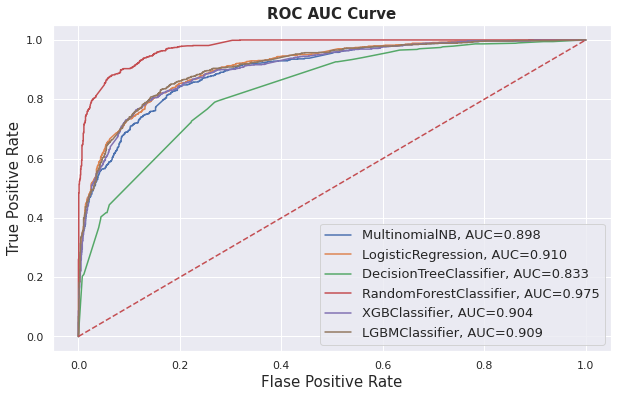

In [ ]:
# ploting the roc auc curve for all models
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1],'r--')

plt.xlabel("Flase Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()